**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dataset**

In [ ]:
plant1_gen = pd.read_csv('/content/drive/MyDrive/solarforecasting/Plant_1_Generation_Data.csv')
plant2_gen = pd.read_csv('/content/drive/MyDrive/solarforecasting/Plant_2_Generation_Data.csv')

In [ ]:
plant1_sens = pd.read_csv('/content/drive/MyDrive/solarforecasting/Plant_1_Weather_Sensor_Data.csv')
plant2_sens = pd.read_csv('/content/drive/MyDrive/solarforecasting/Plant_2_Weather_Sensor_Data.csv')

**Data Preprocessing and Analysis**

Power Generation Data Analysis

In [ ]:
plant1_gen

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

In [ ]:
plant1_gen['DATE_TIME'] = pd.to_datetime(plant1_gen['DATE_TIME'], format='%d-%m-%Y %H:%M')
plant1_sens['DATE_TIME'] = pd.to_datetime(plant1_sens['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
plant2_gen['DATE_TIME'] = pd.to_datetime(plant2_gen['DATE_TIME'], format='%Y-%m-%d %H:%M')
plant2_sens['DATE_TIME'] = pd.to_datetime(plant2_sens['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
plant1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
plant1_gen.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

In [ ]:
plant2_gen

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1     2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2     2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3     2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4     2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
...                   ...       ...              ...       ...       ...   
67693 2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694 2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695 2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696 2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697 2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD   TOTAL_YIELD  
0      9425.000000  2.429011e+06  
1         0.000000  1.215279e+09  
2      3075.333333  2.247720e+09  
3       269.933333  1.704250e+06  
4      3177.000000  1.994153e+07  
...            ...           ...  
67693  4157.000000  5.207580e+05  
67694  3931.000000  1.211314e+08  
67695  4322.000000  2.427691e+06  
67696  4218.000000  1.068964e+08  
67697  4316.000000  2.093357e+08  

[67698 rows x 7 columns]

In [ ]:
plant2_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
plant2_gen.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

Plant 1 Generation Data


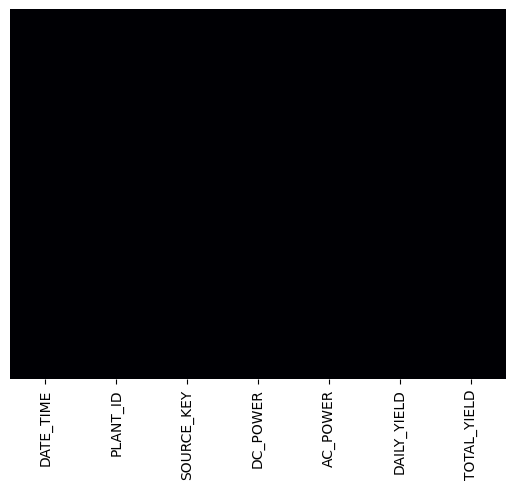

Plant 2 Generation Data


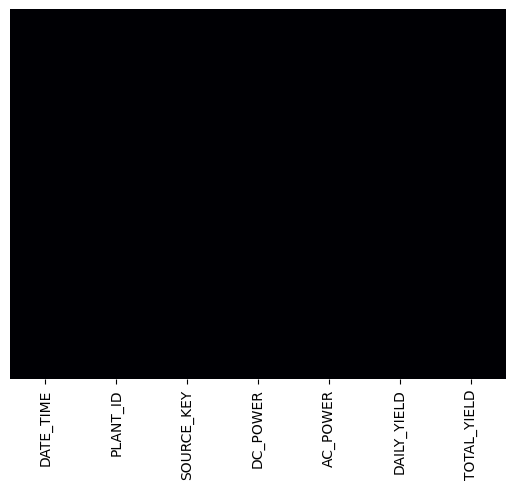

In [ ]:
print('Plant 1 Generation Data')
sbn.heatmap(plant1_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Generation Data')
sbn.heatmap(plant2_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

In [ ]:
print('No. of inverters in Solar Power Plant 1: {}'.format(plant1_gen['SOURCE_KEY'].nunique()))
print('No. of inverters in Solar Power Plant 2: {}'.format(plant2_gen['SOURCE_KEY'].nunique()))

No. of inverters in Solar Power Plant 1: 22
No. of inverters in Solar Power Plant 2: 22


Plant 1 Inverters


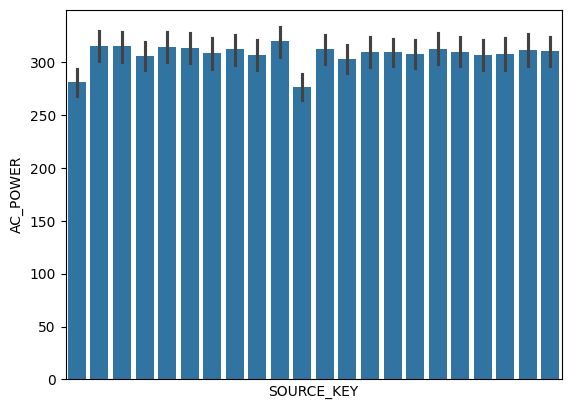

Plant 2 Inverters


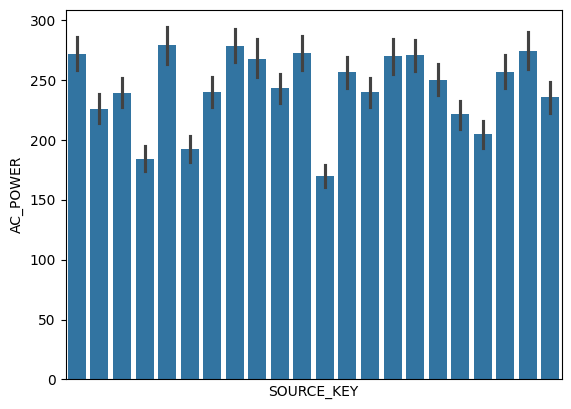

In [ ]:
print('Plant 1 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant1_gen)
plt.xticks([])
plt.show()

print('Plant 2 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant2_gen)
plt.xticks([])
plt.show()

In [ ]:
plant1_gendaily = plant1_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_gendaily

DATE_TIME  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD
0    2020-05-15 00:00:00       0.0       0.0       0.000000  143581676.0
1    2020-05-15 00:15:00       0.0       0.0       0.000000  143581676.0
2    2020-05-15 00:30:00       0.0       0.0       0.000000  143581676.0
3    2020-05-15 00:45:00       0.0       0.0       0.000000  143581676.0
4    2020-05-15 01:00:00       0.0       0.0       0.000000  150761642.0
...                  ...       ...       ...            ...          ...
3153 2020-06-17 22:45:00       0.0       0.0  129571.000000  156142755.0
3154 2020-06-17 23:00:00       0.0       0.0  129571.000000  156142755.0
3155 2020-06-17 23:15:00       0.0       0.0  129571.000000  156142755.0
3156 2020-06-17 23:30:00       0.0       0.0  129571.000000  156142755.0
3157 2020-06-17 23:45:00       0.0       0.0  127962.767857  156142755.0

[3158 rows x 5 columns]

In [ ]:
plant1_gendaily.describe()

DC_POWER      AC_POWER    DAILY_YIELD   TOTAL_YIELD
count    3158.000000   3158.000000    3158.000000  3.158000e+03
mean    68547.713729   6703.628149   71782.817545  1.519892e+08
std     88044.612181   8603.120476   65974.417997  1.061670e+07
min         0.000000      0.000000       0.000000  2.654004e+07
25%         0.000000      0.000000      90.750000  1.520976e+08
50%      8515.285714    823.033036   66068.000000  1.535320e+08
75%    140386.504463  13750.606696  129398.500000  1.549950e+08
max    298937.785710  29150.212499  193770.000000  1.561428e+08

In [ ]:
plant2_gendaily = plant2_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant2_gendaily

DATE_TIME  DC_POWER  AC_POWER   DAILY_YIELD   TOTAL_YIELD
0    2020-05-15 00:00:00       0.0       0.0  48899.938095  1.418960e+10
1    2020-05-15 00:15:00       0.0       0.0  28401.000000  1.418960e+10
2    2020-05-15 00:30:00       0.0       0.0  28401.000000  1.418960e+10
3    2020-05-15 00:45:00       0.0       0.0  28401.000000  1.418960e+10
4    2020-05-15 01:00:00       0.0       0.0  26516.000000  1.418960e+10
...                  ...       ...       ...           ...           ...
3254 2020-06-17 22:45:00       0.0       0.0  93040.000000  1.419408e+10
3255 2020-06-17 23:00:00       0.0       0.0  93040.000000  1.419408e+10
3256 2020-06-17 23:15:00       0.0       0.0  93040.000000  1.419408e+10
3257 2020-06-17 23:30:00       0.0       0.0  93040.000000  1.419408e+10
3258 2020-06-17 23:45:00       0.0       0.0  93040.000000  1.419408e+10

[3259 rows x 5 columns]

In [ ]:
plant2_gendaily.describe()

DC_POWER      AC_POWER    DAILY_YIELD   TOTAL_YIELD
count   3259.000000   3259.000000    3259.000000  3.259000e+03
mean    5124.648465   5011.974903   68443.535809  1.368802e+10
std     6462.118509   6317.872611   48505.077129  1.245968e+09
min        0.000000      0.000000       0.000000  0.000000e+00
25%        0.000000      0.000000   18698.245238  1.335913e+10
50%      494.427143    477.536667   73875.000000  1.419016e+10
75%    11048.773333  10795.727619  110975.223810  1.419312e+10
max    26630.506667  25979.760476  162876.000000  1.419408e+10

In [ ]:
#Plant 1 generation data
plant1_gendaily['DATE_TIME'] = pd.to_datetime(plant1_gendaily['DATE_TIME']) # Conversion using Pandas built-in method
plant1_gendaily['TIME'] = plant1_gendaily['DATE_TIME'].dt.time # Creates new column and passes TIME into time
plant1_gendaily['DATE'] = pd.to_datetime(plant1_gendaily['DATE_TIME'].dt.date) # Creates new column and passes DATE into time

#Plant 2 generation data
plant2_gendaily['DATE_TIME'] = pd.to_datetime(plant2_gendaily['DATE_TIME'])
plant2_gendaily['TIME'] = plant2_gendaily['DATE_TIME'].dt.time
plant2_gendaily['DATE'] = pd.to_datetime(plant2_gendaily['DATE_TIME'].dt.date)

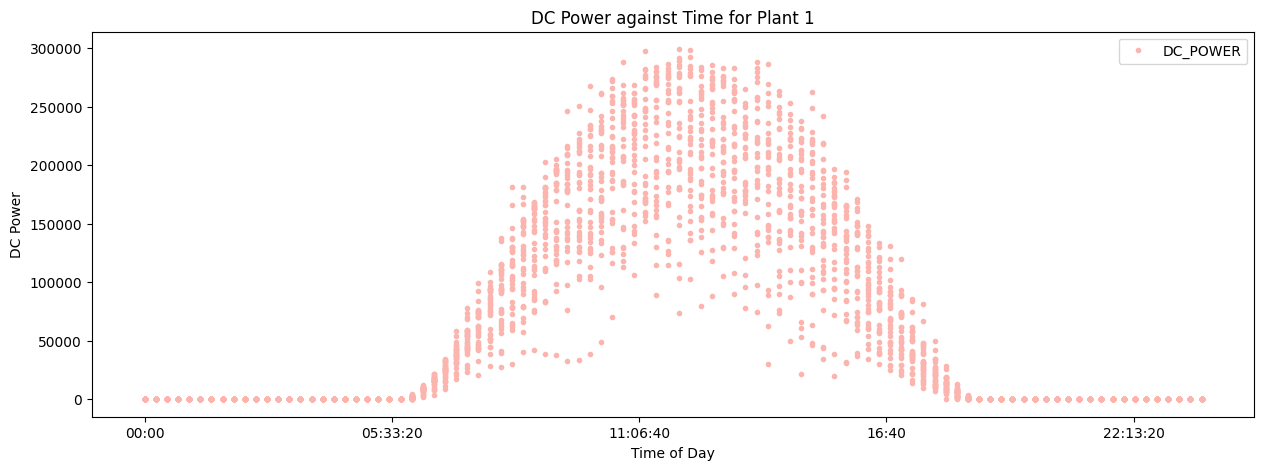

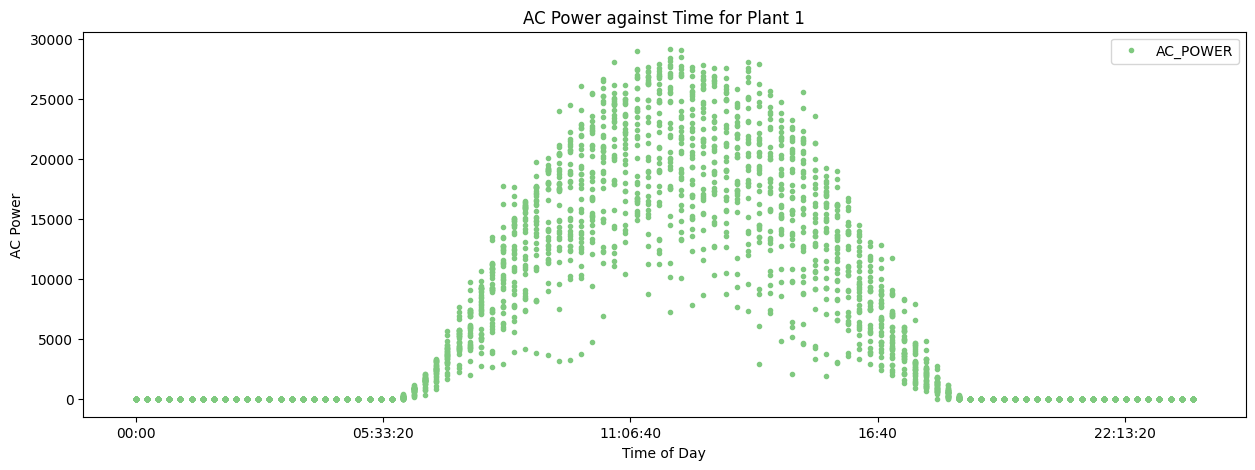

In [ ]:
plant1_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 1')
plt.show()

plant1_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent')
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 1')
plt.show()

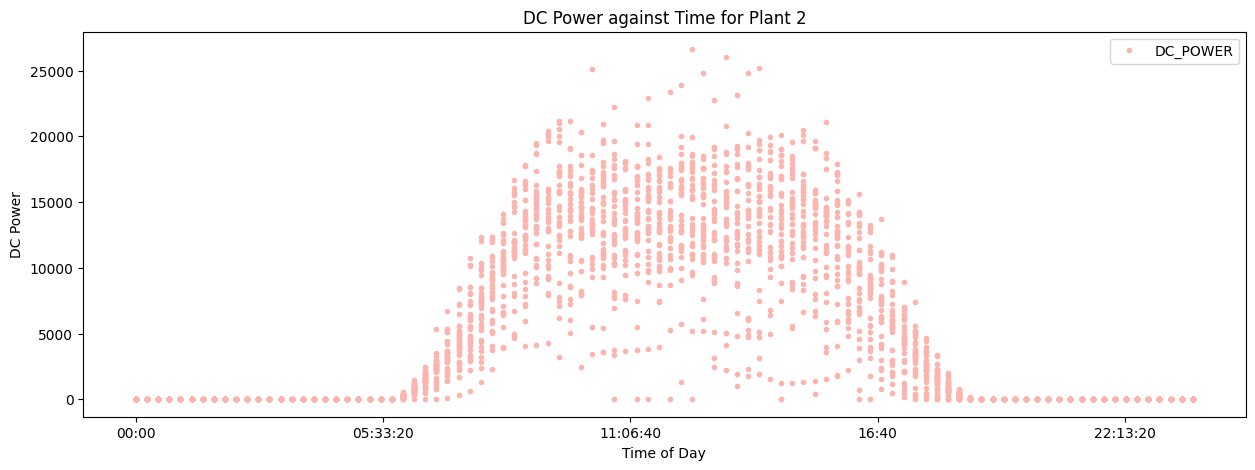

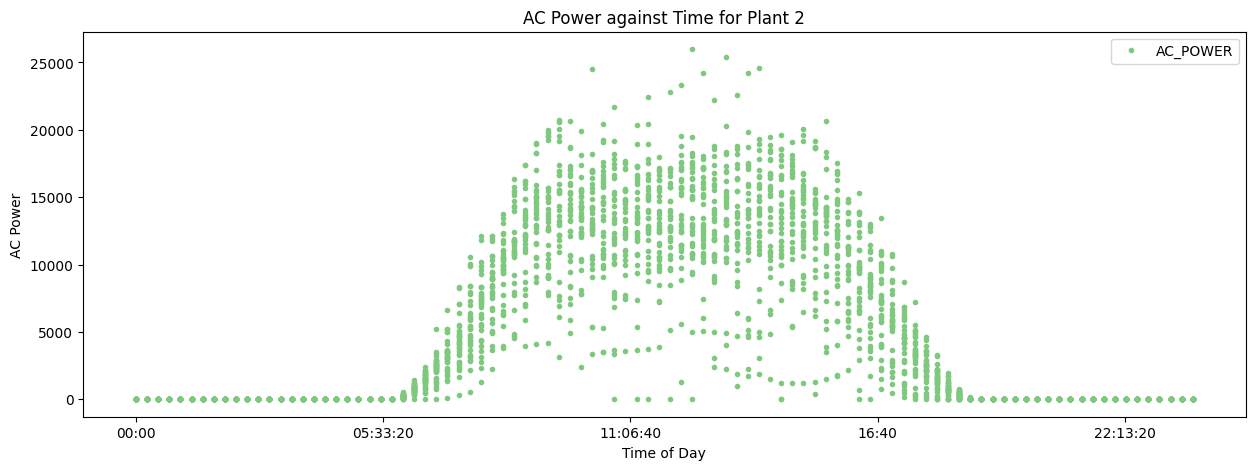

In [ ]:
plant2_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 2')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent')
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 2')
plt.show()

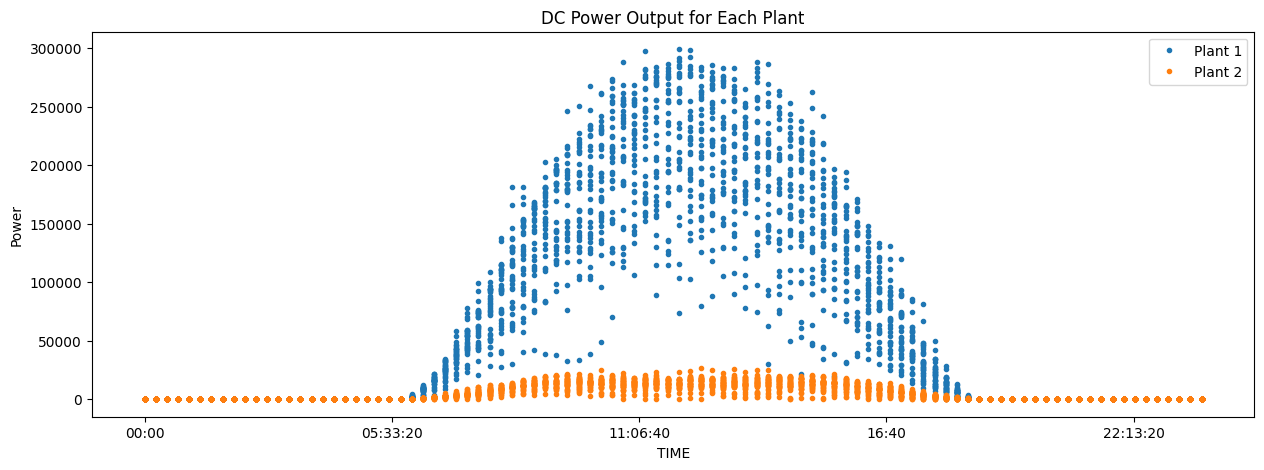

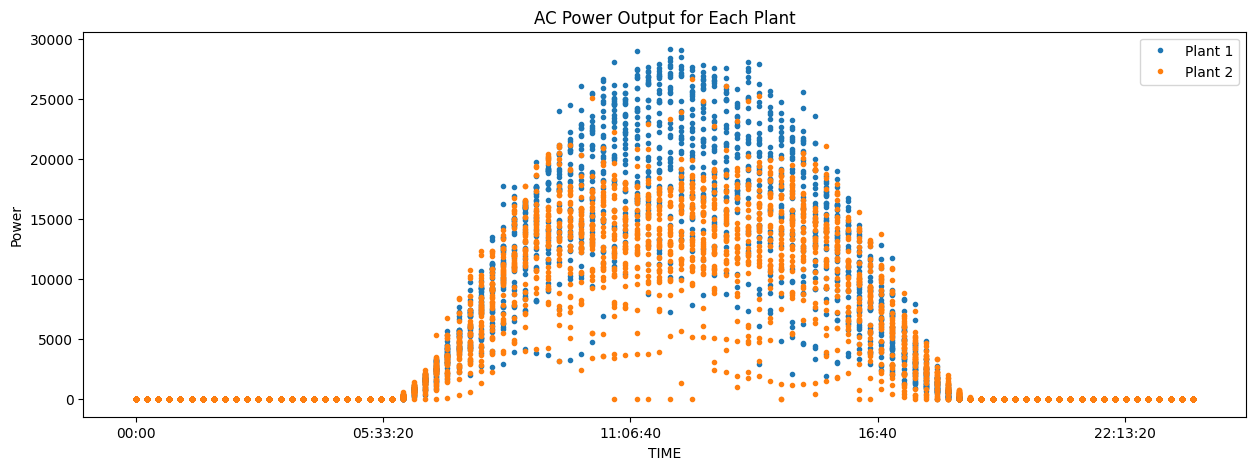

In [ ]:
# DC output from solar module
DCcompare = plant1_gendaily.plot(x='TIME', y='DC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=DCcompare)
plt.title('DC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

# AC output from inverter
ACcompare = plant1_gendaily.plot(x='TIME', y='AC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=ACcompare)
plt.title('AC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

In [ ]:
g1corr = plant1_gen.drop('PLANT_ID', axis=1).corr()
g2corr = plant2_gen.drop('PLANT_ID', axis=1).corr()

print('Plant 1 Generation Data Correlation Coefficient')
print(g1corr)

print('Plant 2 Generation Data Correlation Coefficient')
print(g2corr)

Plant 1 Generation Data Correlation Coefficient
             DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DC_POWER     1.000000  0.999996     0.082284     0.003815
AC_POWER     0.999996  1.000000     0.082234     0.003804
DAILY_YIELD  0.082284  0.082234     1.000000     0.009867
TOTAL_YIELD  0.003815  0.003804     0.009867     1.000000
Plant 2 Generation Data Correlation Coefficient
             DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DC_POWER     1.000000  0.999997     0.005593     0.004528
AC_POWER     0.999997  1.000000     0.005395     0.004533
DAILY_YIELD  0.005593  0.005395     1.000000    -0.068472
TOTAL_YIELD  0.004528  0.004533    -0.068472     1.000000


<ipython-input-23-842d12752519>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g1corr = plant1_gen.drop('PLANT_ID', axis=1).corr()
<ipython-input-23-842d12752519>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g2corr = plant2_gen.drop('PLANT_ID', axis=1).corr()


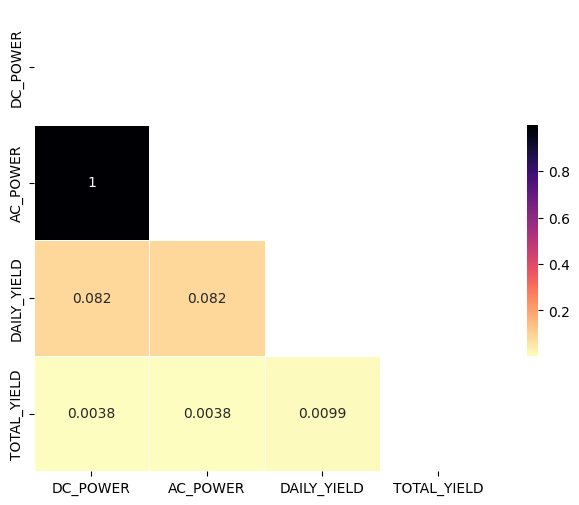

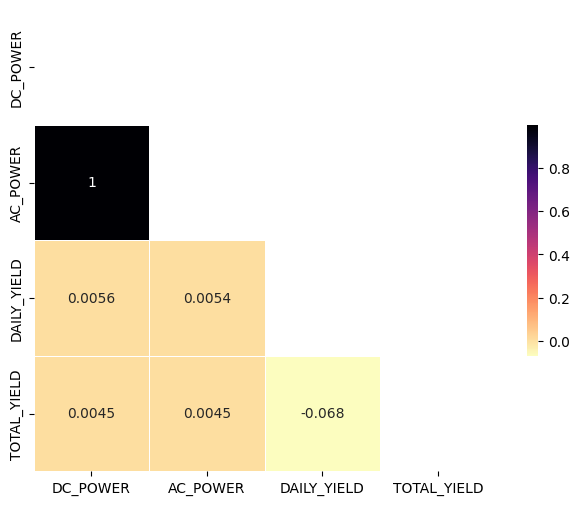

In [ ]:
g1mask = np.triu(np.ones_like(g1corr, dtype=bool))
g2mask = np.triu(np.ones_like(g2corr, dtype=bool))

cmap = 'magma_r'

f, ax = plt.subplots(figsize=(8, 6))
sbn.heatmap(g1corr, mask=g1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

f, ax = plt.subplots(figsize=(8, 6))
sbn.heatmap(g2corr, mask=g2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

Weather Sensor Data Analysis

In [ ]:
plant1_sens

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1    2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2    2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3    2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4    2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                  ...       ...              ...                  ...   
3177 2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe            22.150570   
3178 2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe            22.129816   
3179 2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe            22.008275   
3180 2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe            21.969495   
3181 2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe            21.909288   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
3177           21.480377          0.0  
3178           21.389024          0.0  
3179           20.709211          0.0  
3180           20.734963          0.0  
3181           20.427972          0.0  

[3182 rows x 6 columns]

In [ ]:
plant1_sensdaily = plant1_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant1_sensdaily

<ipython-input-26-8fa15f561bcb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()


DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0    2020-05-15 00:00:00            25.184316           22.857507          0.0
1    2020-05-15 00:15:00            25.084589           22.761668          0.0
2    2020-05-15 00:30:00            24.935753           22.592306          0.0
3    2020-05-15 00:45:00            24.846130           22.360852          0.0
4    2020-05-15 01:00:00            24.621525           22.165423          0.0
...                  ...                  ...                 ...          ...
3177 2020-06-17 22:45:00            22.150570           21.480377          0.0
3178 2020-06-17 23:00:00            22.129816           21.389024          0.0
3179 2020-06-17 23:15:00            22.008275           20.709211          0.0
3180 2020-06-17 23:30:00            21.969495           20.734963          0.0
3181 2020-06-17 23:45:00            21.909288           20.427972          0.0

[3182 rows x 4 columns]

In [ ]:
plant2_sensdaily = plant2_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant2_sensdaily

<ipython-input-27-9f1128f21af3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()


DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0    2020-05-15 00:00:00            27.004764           25.060789          0.0
1    2020-05-15 00:15:00            26.880811           24.421869          0.0
2    2020-05-15 00:30:00            26.682055           24.427290          0.0
3    2020-05-15 00:45:00            26.500589           24.420678          0.0
4    2020-05-15 01:00:00            26.596148           25.088210          0.0
...                  ...                  ...                 ...          ...
3254 2020-06-17 22:45:00            23.511703           22.856201          0.0
3255 2020-06-17 23:00:00            23.482282           22.744190          0.0
3256 2020-06-17 23:15:00            23.354743           22.492245          0.0
3257 2020-06-17 23:30:00            23.291048           22.373909          0.0
3258 2020-06-17 23:45:00            23.202871           22.535908          0.0

[3259 rows x 4 columns]

In [ ]:
#Plant 1 sensor data
plant1_sensdaily['DATE_TIME'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'])
plant1_sensdaily['TIME'] = plant1_sensdaily['DATE_TIME'].dt.time
plant1_sensdaily['DATE'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'].dt.date)

#Plant 2 sensor data
plant2_sensdaily['DATE_TIME'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'])
plant2_sensdaily['TIME'] = plant2_sensdaily['DATE_TIME'].dt.time
plant2_sensdaily['DATE'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'].dt.date)

In [ ]:
plant1_sensdaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
 4   TIME                 3182 non-null   object        
 5   DATE                 3182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 149.3+ KB


In [ ]:
plant2_sensdaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3259 non-null   float64       
 2   MODULE_TEMPERATURE   3259 non-null   float64       
 3   IRRADIATION          3259 non-null   float64       
 4   TIME                 3259 non-null   object        
 5   DATE                 3259 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 152.9+ KB


In [ ]:
plant1_sensdaily.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'TIME', 'DATE'],
      dtype='object')

In [ ]:
plant1_sensdaily['DATE'].nunique()

34

In [ ]:
plant2_sensdaily['DATE'].nunique()

34

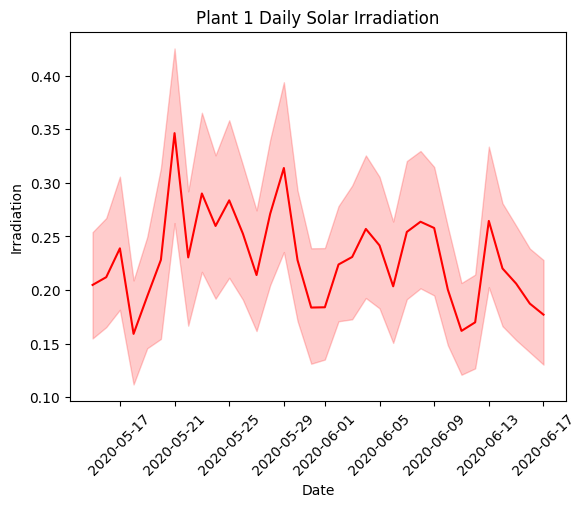

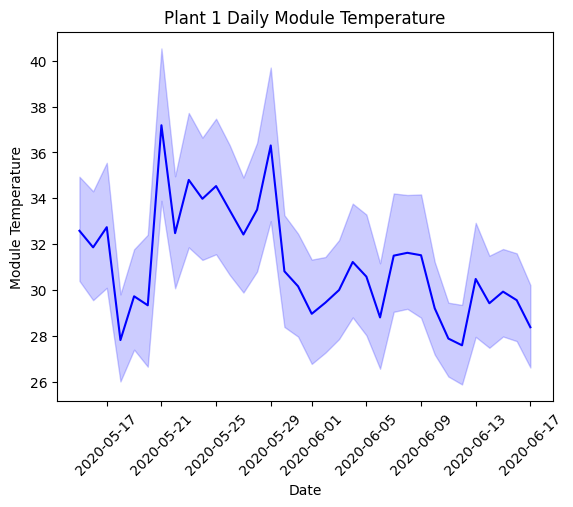

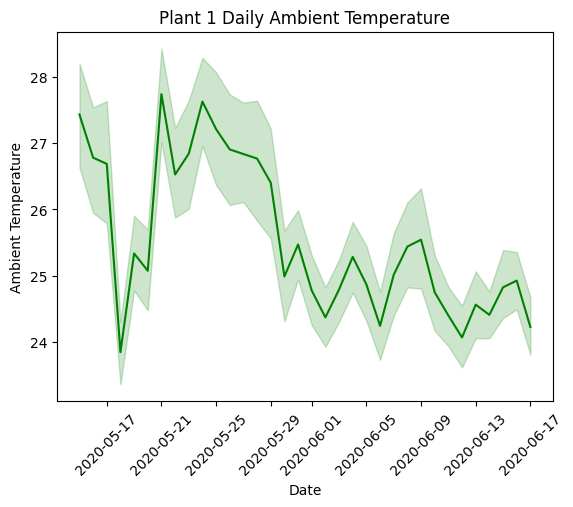

In [ ]:
#Plant 1
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 1 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

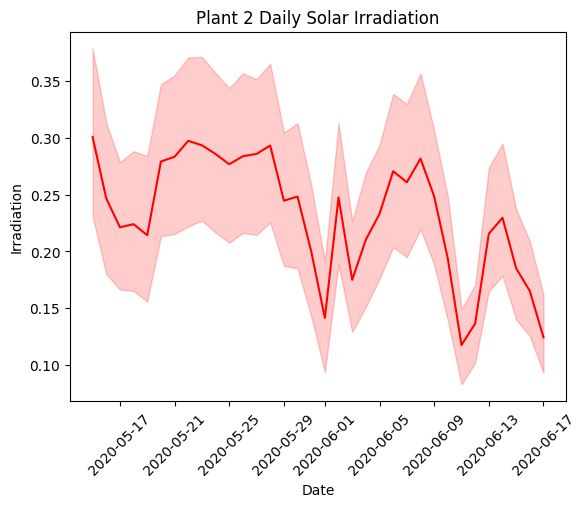

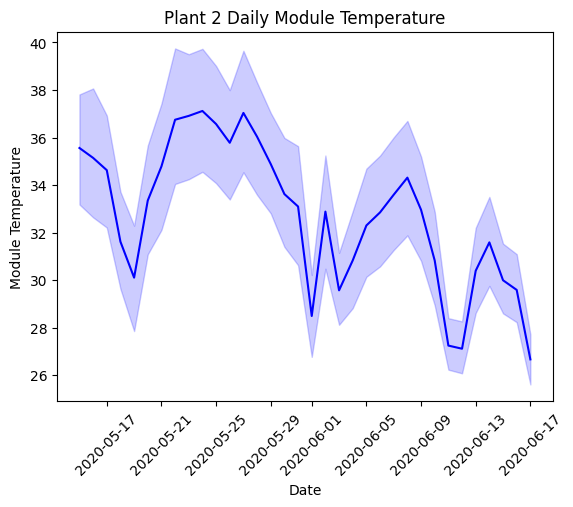

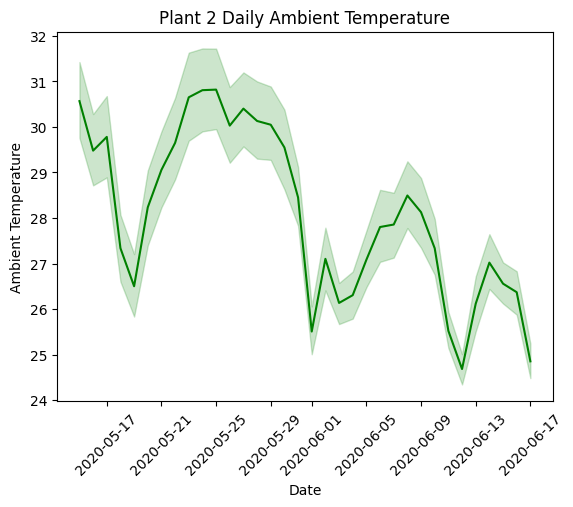

In [ ]:
#Plant 2
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 2 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

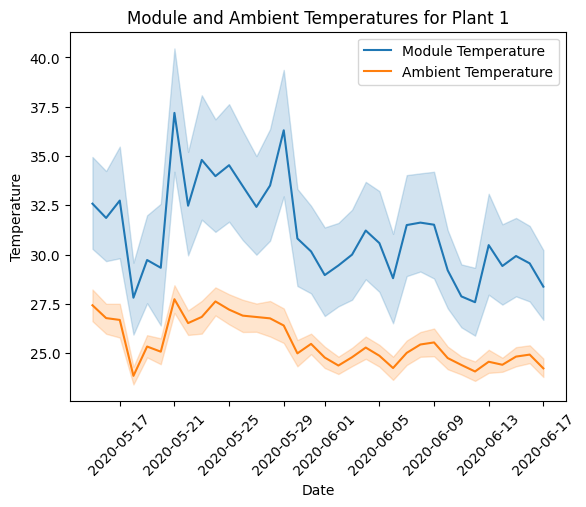

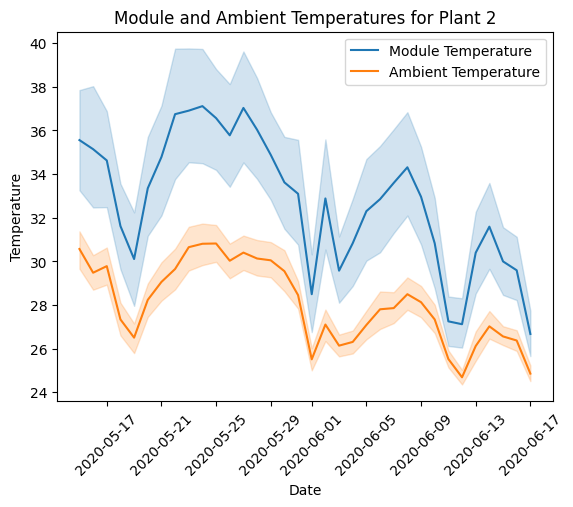

In [ ]:
# Plant 1 temperature sensors
tempsens_plant1 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant1)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 1')
plt.xticks(rotation=45)
plt.show()

# Plant 2 temperature sensors
tempsens_plant2 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant2)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 2')
plt.xticks(rotation=45)
plt.show()

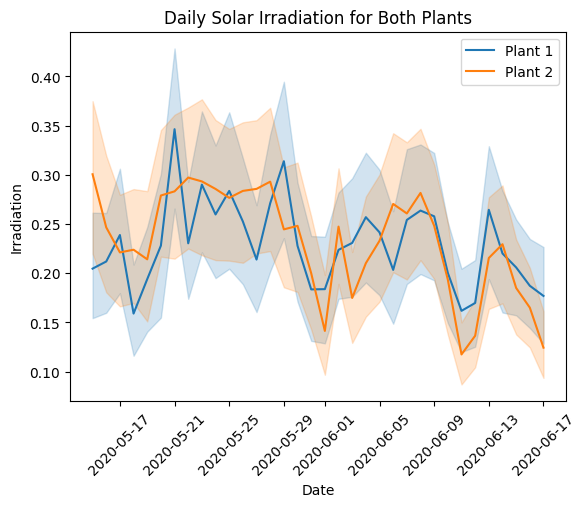

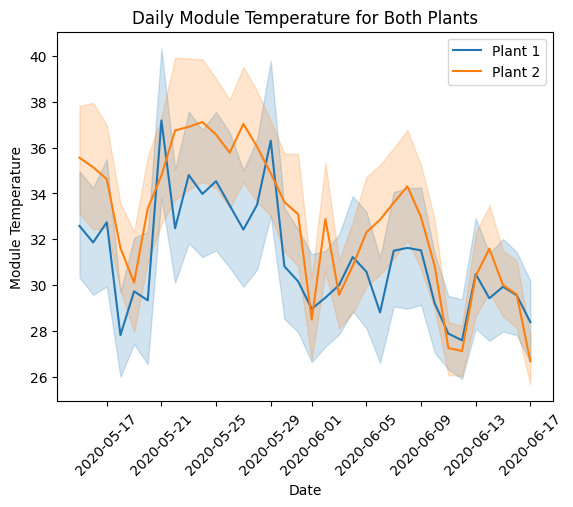

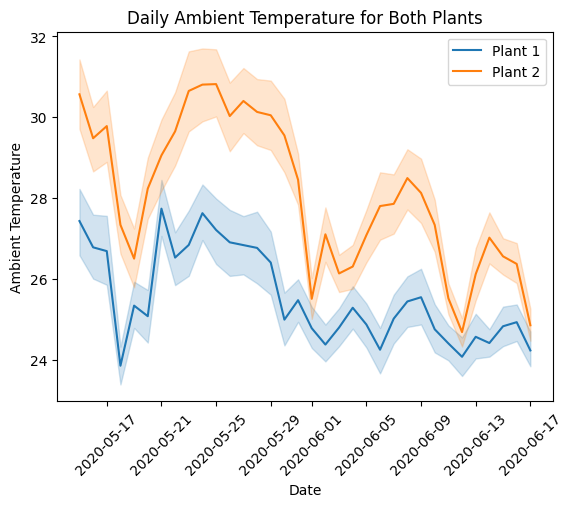

In [ ]:
# Comparing both plants
# Daily Irradiation
ambient_compare = sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambient_compare)
plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Daily Solar Irradiation for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Module Temperature
modtemp_compare = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=modtemp_compare)
plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Daily Module Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Ambient Temperature
ambtemp_compare = sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambtemp_compare)
plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Daily Ambient Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plant1_sensdaily.describe()

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count          3182.000000         3182.000000  3182.000000
mean             25.531606           31.091015     0.228313
std               3.354856           12.261222     0.300836
min              20.398505           18.140415     0.000000
25%              22.705182           21.090553     0.000000
50%              24.613814           24.618060     0.024653
75%              27.920532           41.307840     0.449588
max              35.252486           65.545714     1.221652

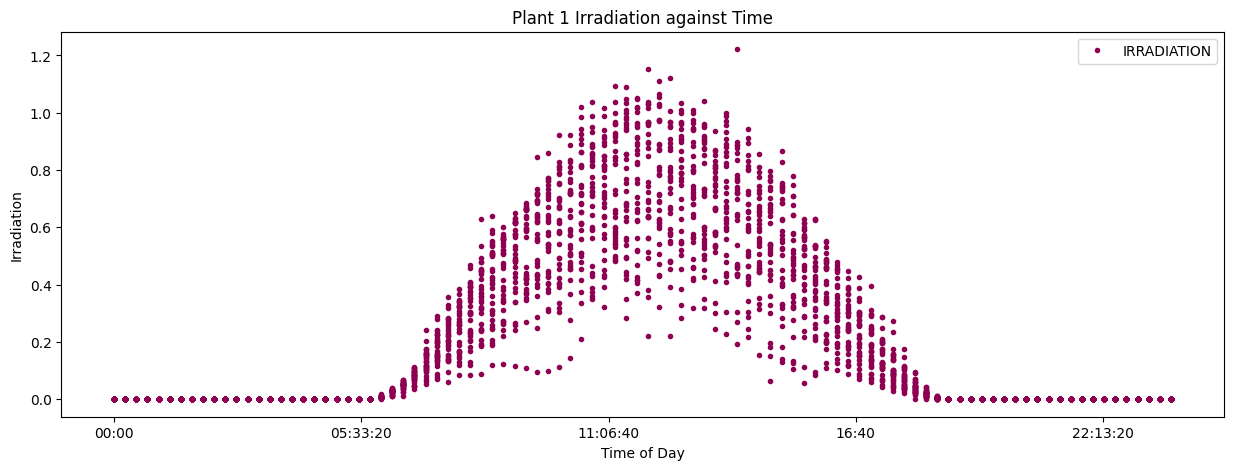

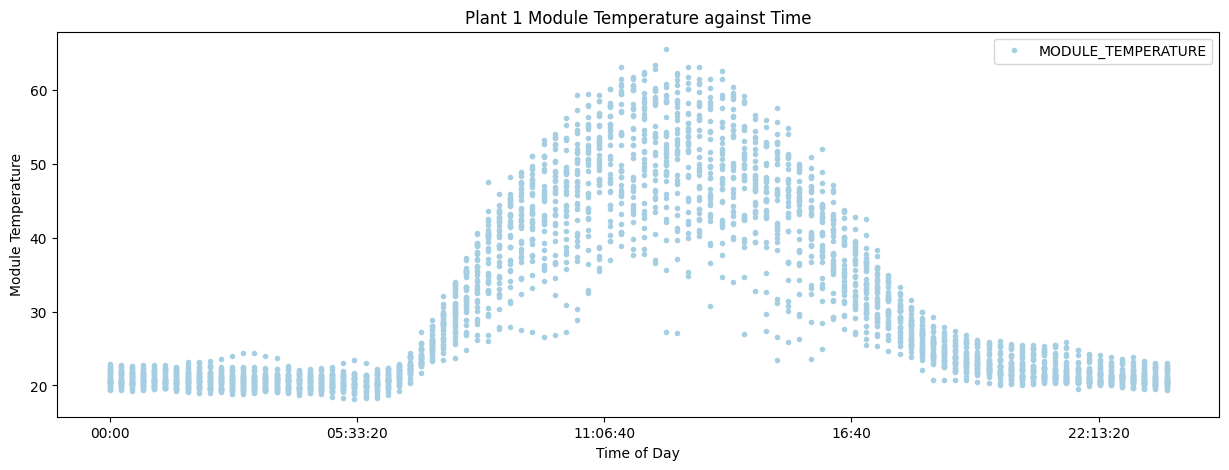

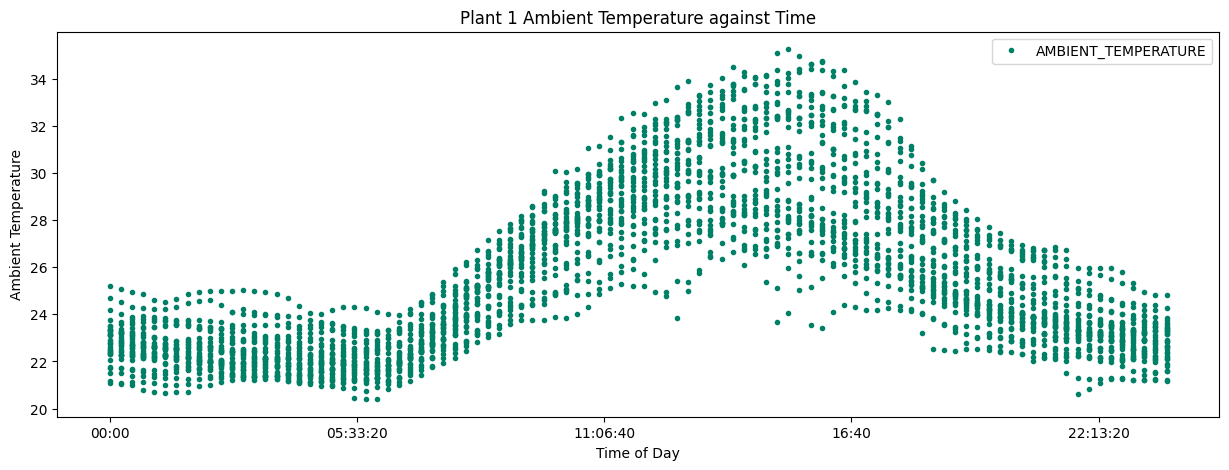

In [ ]:
# Plant 1
# Irradiation
plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 1 Irradiation against Time')
plt.show()

# Module Temperature
plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired')
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer')
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Ambient Temperature against Time')
plt.show()

In [ ]:
plant2_sensdaily.describe()

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count          3259.000000         3259.000000  3259.000000
mean             28.069400           32.772408     0.232737
std               4.061556           11.344034     0.312693
min              20.942385           20.265123     0.000000
25%              24.602135           23.716881     0.000000
50%              26.981263           27.534606     0.019040
75%              31.056757           40.480653     0.438717
max              39.181638           66.635953     1.098766

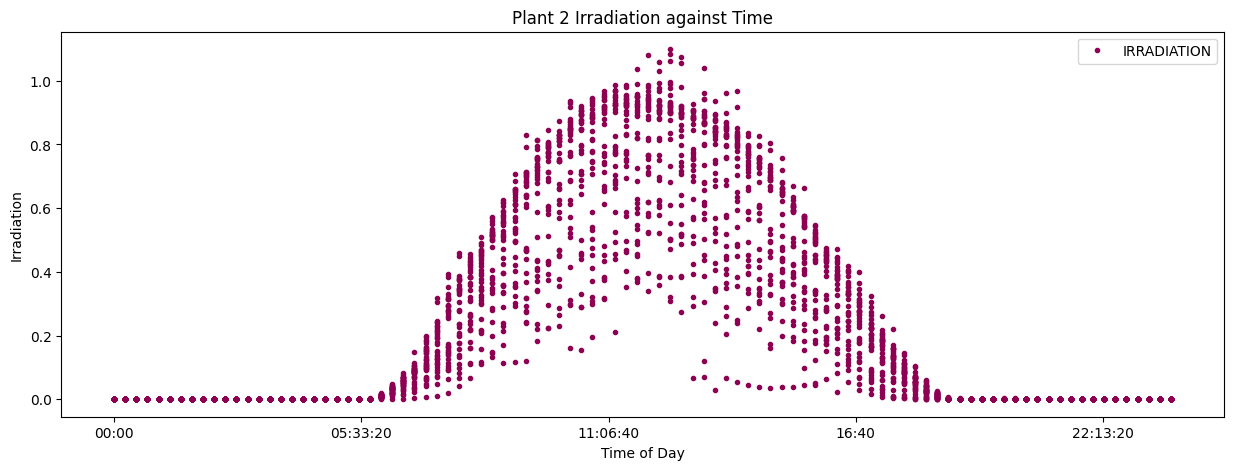

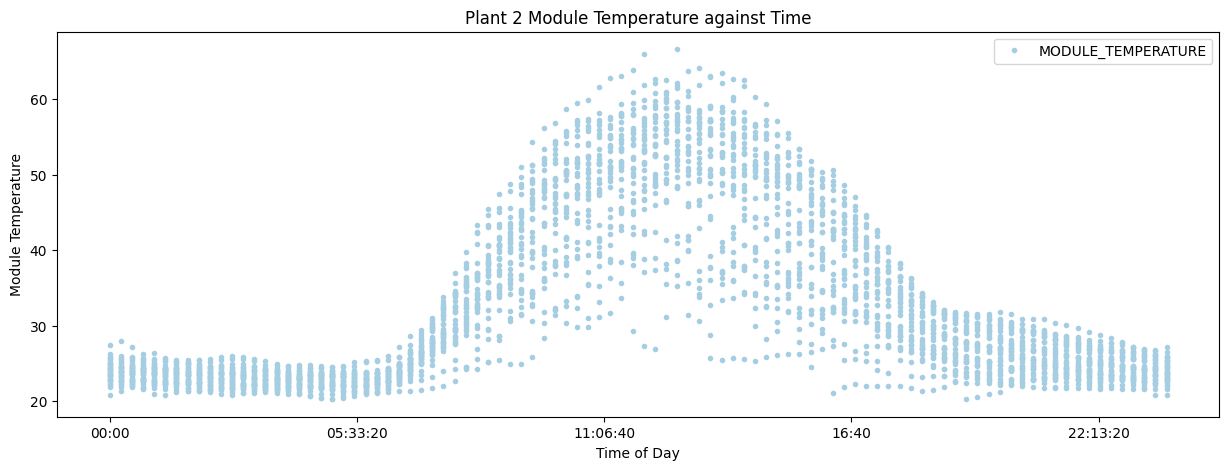

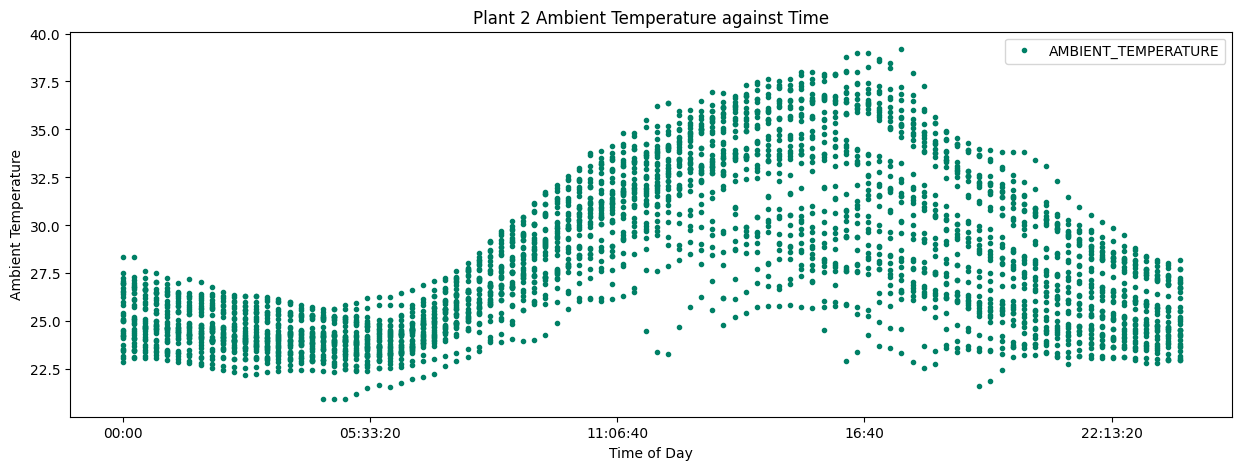

In [ ]:
# Plant 2
# Irradiation
plant2_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 2 Irradiation against Time')
plt.show()

# Module Temperature
plant2_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired')
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant2_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer')
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Ambient Temperature against Time')
plt.show()

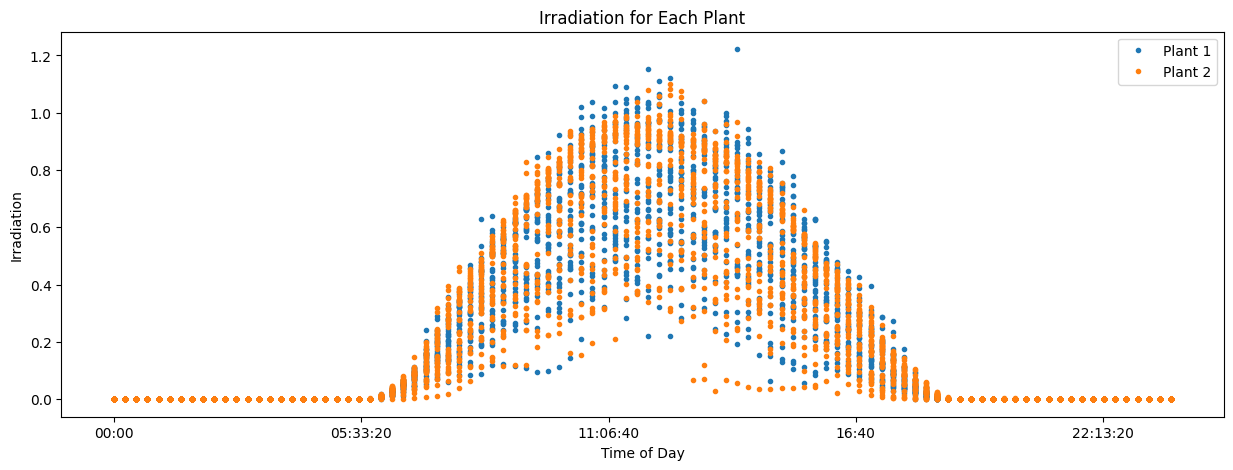

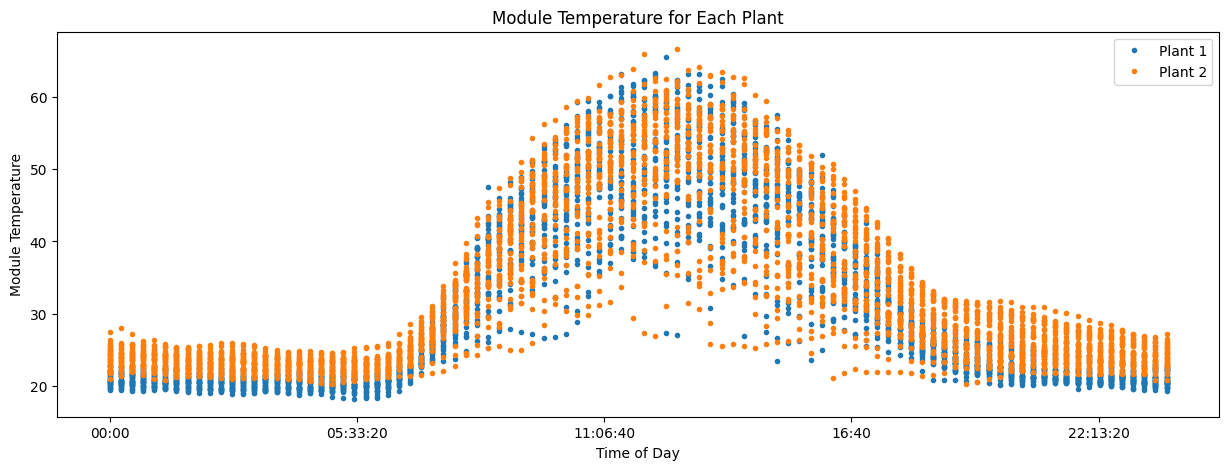

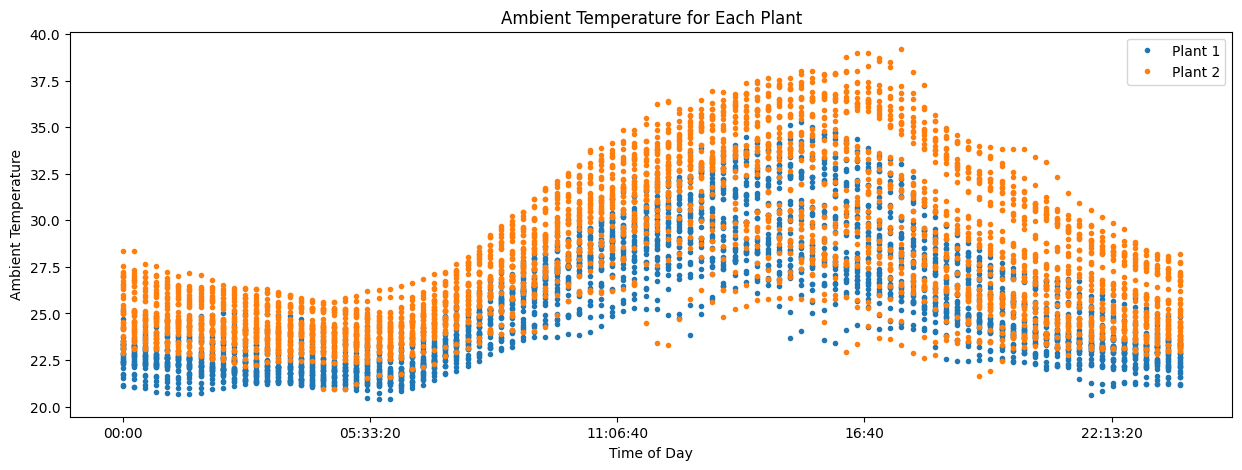

In [ ]:
# Hourly sens for each plant

# Irradiation
irr_hour = plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='IRRADIATION', style='.', label='Plant 2', ax=irr_hour)
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Irradiation for Each Plant')
plt.show()

# Module temperature
modtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Plant 2', ax=modtemp_hour)
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Module Temperature for Each Plant')
plt.show()

# Ambient temperature
ambtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Plant 2', ax=ambtemp_hour)
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Ambient Temperature for Each Plant')
plt.show()

Merging the Data

In [ ]:
mergedata1 = pd.merge(plant1_gen.drop(columns = ['PLANT_ID']), plant1_sens.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
mergedata1.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
2 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
3 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   
4 2020-05-15  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            25.184316           22.857507          0.0  
1            25.184316           22.857507          0.0  
2            25.184316           22.857507          0.0  
3            25.184316           22.857507          0.0  
4            25.184316           22.857507          0.0

In [ ]:
mergedata2 = pd.merge(plant2_gen.drop(columns = ['PLANT_ID']), plant2_sens.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
mergedata2.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764           25.060789          0.0  
3            27.004764           25.060789          0.0  
4            27.004764           25.060789          0.0

In [ ]:
mergedata1["DATE"] = pd.to_datetime(mergedata1["DATE_TIME"]).dt.date
mergedata1["TIME"] = pd.to_datetime(mergedata1["DATE_TIME"]).dt.time
mergedata1['DAY'] = pd.to_datetime(mergedata1['DATE_TIME']).dt.day
mergedata1['MONTH'] = pd.to_datetime(mergedata1['DATE_TIME']).dt.month
mergedata1['YEAR'] = pd.to_datetime(mergedata1['DATE_TIME']).dt.isocalendar().year

mergedata1['HOURS'] = pd.to_datetime(mergedata1['TIME'], format='%H:%M:%S').dt.hour
mergedata1['MINUTES'] = pd.to_datetime(mergedata1['TIME'], format='%H:%M:%S').dt.minute
mergedata1['TOTAL MINUTES PASS'] = mergedata1['MINUTES'] + mergedata1['HOURS']*60

mergedata1["DATE_STRING"] = mergedata1["DATE"].astype(str)
mergedata1["HOURS"] = mergedata1["HOURS"].astype(str)
mergedata1["TIME"] = mergedata1["TIME"].astype(str)

mergedata1.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            25.184316           22.857507          0.0  2020-05-15  00:00:00   
1            25.184316           22.857507          0.0  2020-05-15  00:00:00   

   DAY  MONTH  YEAR HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5  2020     0        0                   0  2020-05-15  
1   15      5  2020     0        0                   0  2020-05-15

In [ ]:
mergedata2["DATE"] = pd.to_datetime(mergedata2["DATE_TIME"]).dt.date
mergedata2["TIME"] = pd.to_datetime(mergedata2["DATE_TIME"]).dt.time
mergedata2['DAY'] = pd.to_datetime(mergedata2['DATE_TIME']).dt.day
mergedata2['MONTH'] = pd.to_datetime(mergedata2['DATE_TIME']).dt.month
mergedata2['YEAR'] = pd.to_datetime(mergedata2['DATE_TIME']).dt.isocalendar().year

mergedata2['HOURS'] = pd.to_datetime(mergedata2['TIME'], format='%H:%M:%S').dt.hour
mergedata2['MINUTES'] = pd.to_datetime(mergedata2['TIME'], format='%H:%M:%S').dt.minute
mergedata2['TOTAL MINUTES PASS'] = mergedata2['MINUTES'] + mergedata2['HOURS']*60

mergedata2["DATE_STRING"] = mergedata2["DATE"].astype(str)
mergedata2["HOURS"] = mergedata2["HOURS"].astype(str)
mergedata2["TIME"] = mergedata2["TIME"].astype(str)

mergedata2.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0       9425.0  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0          0.0  1.215279e+09   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  YEAR HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5  2020     0        0                   0  2020-05-15  
1   15      5  2020     0        0                   0  2020-05-15

In [ ]:
mergecorr1 = mergedata1.corr()
mergecorr2 = mergedata2.corr()


print('Plant 1 Generation and Sensor Data Correlation Coefficient')
print(mergecorr1)
print('')

print('Plant 2 Generation and Sensor Data Correlation Coefficient')
print(mergecorr2)

Plant 1 Generation and Sensor Data Correlation Coefficient
                     DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  0.999996     0.082243     0.003851   
AC_POWER             0.999996  1.000000     0.082193     0.003840   
DAILY_YIELD          0.082243  0.082193     1.000000     0.009896   
TOTAL_YIELD          0.003851  0.003840     0.009896     1.000000   
AMBIENT_TEMPERATURE  0.724668  0.724903     0.478496    -0.036150   
MODULE_TEMPERATURE   0.954811  0.954924     0.198308    -0.015596   
IRRADIATION          0.989391  0.989340     0.078317    -0.005490   
DAY                  0.033072  0.032997     0.019999    -0.072982   
MONTH               -0.037610 -0.037525    -0.012959     0.149765   
YEAR                      NaN       NaN          NaN          NaN   
MINUTES              0.001174  0.001156     0.017584     0.000101   
TOTAL MINUTES PASS   0.024113  0.024109     0.836210     0.005002   

                     AMBIENT_TEMPERATURE  M

<ipython-input-47-437e44601ef9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mergecorr1 = mergedata1.corr()
<ipython-input-47-437e44601ef9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mergecorr2 = mergedata2.corr()


Plant 1


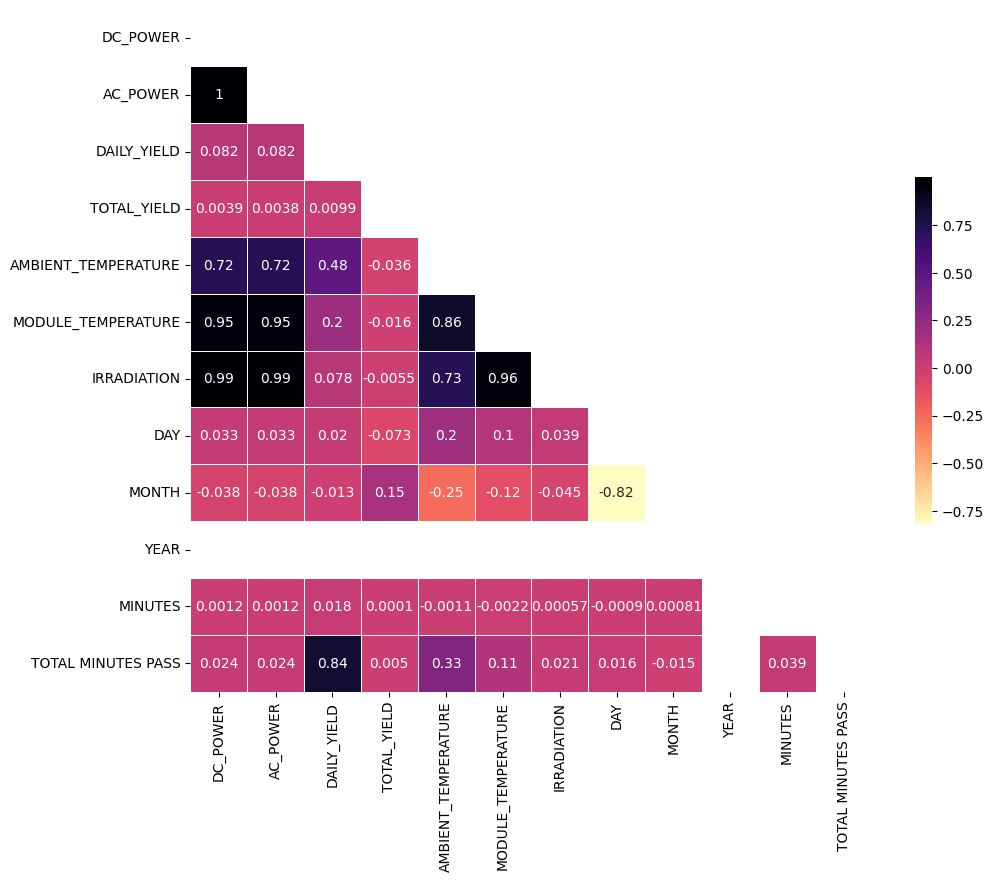

Plant 2


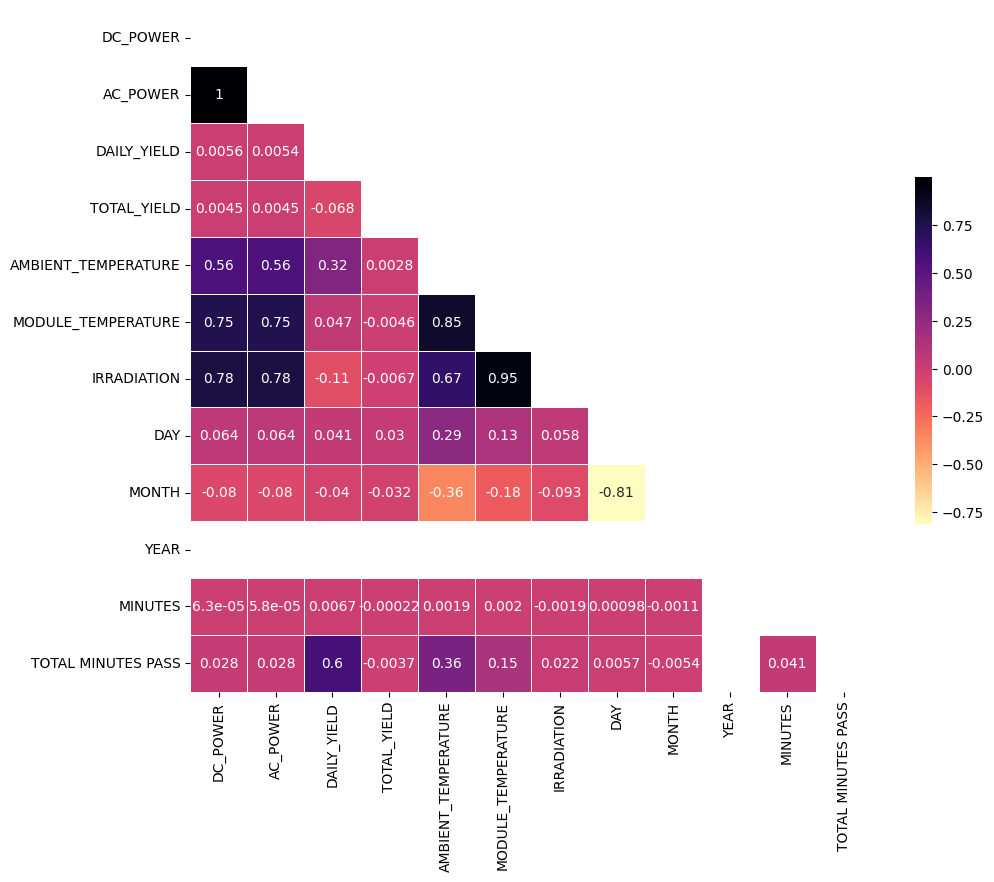

In [ ]:
s1mask = np.triu(np.ones_like(mergecorr1, dtype=bool))
s2mask = np.triu(np.ones_like(mergecorr2, dtype=bool))

cmap = 'magma_r'

print('Plant 1')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(mergecorr1, mask=s1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

print('Plant 2')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(mergecorr2, mask=s2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [ ]:
mergedata1.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DATE', 'TIME', 'DAY', 'MONTH', 'YEAR', 'HOURS',
       'MINUTES', 'TOTAL MINUTES PASS', 'DATE_STRING'],
      dtype='object')

**Model Training and Evaluation**

**Models Trained :** Linear Regression, Decision Tree, Random Forest, RNN, LSTM

**Evaluation Metrics :**

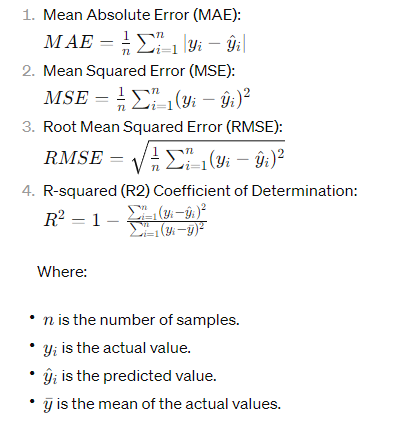

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = mergedata1.copy()

X = df[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df['AC_POWER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df2 = mergedata2.copy()

X2 = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y2 = df2['AC_POWER']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('PLANT 1')
print('The intercept for the linear regression is at', lm.intercept_)
print('The linear regression coefficients are:')

coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(coef_df)

PLANT 1
The intercept for the linear regression is at -1.4047934946319742
The linear regression coefficients are:
                            Coeff
DAILY_YIELD         -4.804340e-05
TOTAL_YIELD         -3.553717e-09
AMBIENT_TEMPERATURE -4.925559e-03
MODULE_TEMPERATURE   8.902386e-02
IRRADIATION         -5.950891e+00
DC_POWER             9.789331e-02


In [ ]:
predictions1 = lm.predict(X_test)
predictions1

array([8.72809030e+02, 1.82084950e-01, 6.12825727e+02, ...,
       3.17273478e-01, 2.01680653e-01, 1.09714350e+03])

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# PLANT 1
MAE1 = metrics.mean_absolute_error(y_test,predictions1)
MSE1 = metrics.mean_squared_error(y_test,predictions1)
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test,predictions1))
r2_1 = r2_score(y_test, predictions1)
print('Plant 1: Linear Regression')
print('MAE: ', MAE1)
print('MSE: ',MSE1)
print('RMSE: ', RMSE1)
print("R-squared (R2):", r2_1)

Plant 1: Linear Regression
MAE:  0.6556119470983207
MSE:  1.9678872312912947
RMSE:  1.4028140401675822
R-squared (R2): 0.9999872467219774


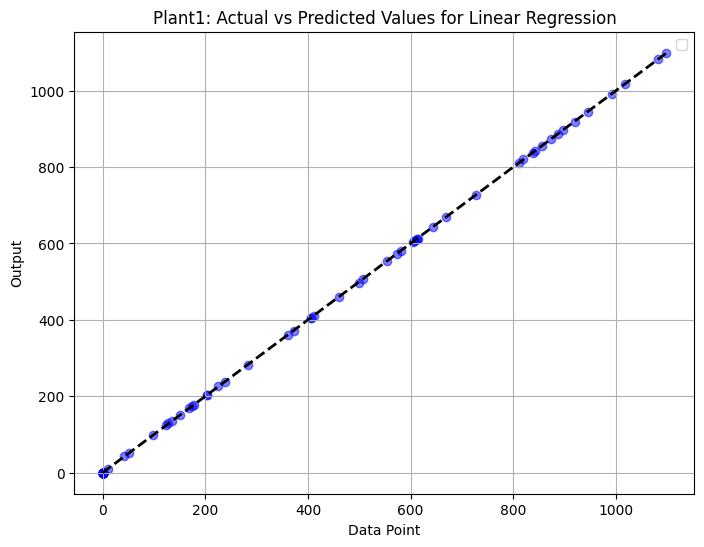

In [ ]:
import matplotlib.pyplot as plt

subset_size = 100
subset_y_test = y_test[:subset_size]
subset_predictions1 = predictions1[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y_test, subset_predictions1, color='blue',alpha=0.5)
plt.plot([subset_y_test.min(), subset_y_test.max()], [subset_y_test.min(), subset_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant1: Actual vs Predicted Values for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
predictions2 = lm2.predict(X2_test)
predictions2

array([1.06547421e+03, 7.23927223e+02, 4.25883500e-01, ...,
       4.69997161e+02, 3.28125509e-01, 2.18699052e-02])

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# PLANT 2
MAE2 = metrics.mean_absolute_error(y2_test,predictions2)
MSE2 = metrics.mean_squared_error(y2_test,predictions2)
RMSE2 = np.sqrt(metrics.mean_squared_error(y2_test,predictions2))
r2_2 = r2_score(y2_test, predictions2)
print('Plant2: Linear Regression')
print('MAE: ', MAE2)
print('MSE: ',MSE2)
print('RMSE: ', RMSE2)
print("R-squared (R2):", r2_2)

Plant2: Linear Regression
MAE:  0.6009896648520529
MSE:  0.7596204845092597
RMSE:  0.8715620944655978
R-squared (R2): 0.9999941717386057


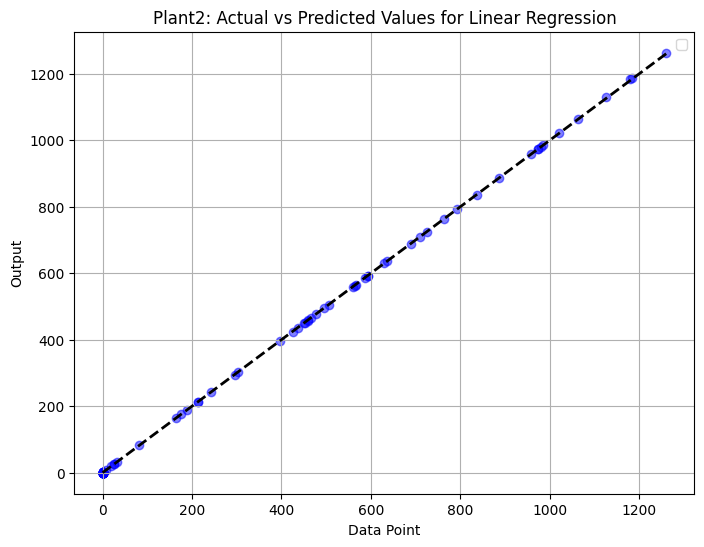

In [ ]:
import matplotlib.pyplot as plt

subset_size = 100
subset_y2_test = y2_test[:subset_size]
subset_predictions2 = predictions2[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y2_test, subset_predictions2, color='blue',alpha=0.5)
plt.plot([subset_y2_test.min(), subset_y2_test.max()], [subset_y2_test.min(), subset_y2_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant2: Actual vs Predicted Values for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['DAILY_YIELD', 'TOTAL_YIELD','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','DC_POWER']]
y = df['AC_POWER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

predictions_dt = decision_tree.predict(X_test)

mae_dt = mean_absolute_error(y_test, predictions_dt)
mse_dt = mean_squared_error(y_test, predictions_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, predictions_dt)

print("Plant1: Decision Tree")
print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R2):", r2_dt)


Plant1: Decision Tree
Mean Absolute Error (MAE): 0.17096348659382035
Mean Squared Error (MSE): 1.3304654053969567
Root Mean Squared Error (RMSE): 1.1534580206478937
R-squared (R2): 0.9999913776587679


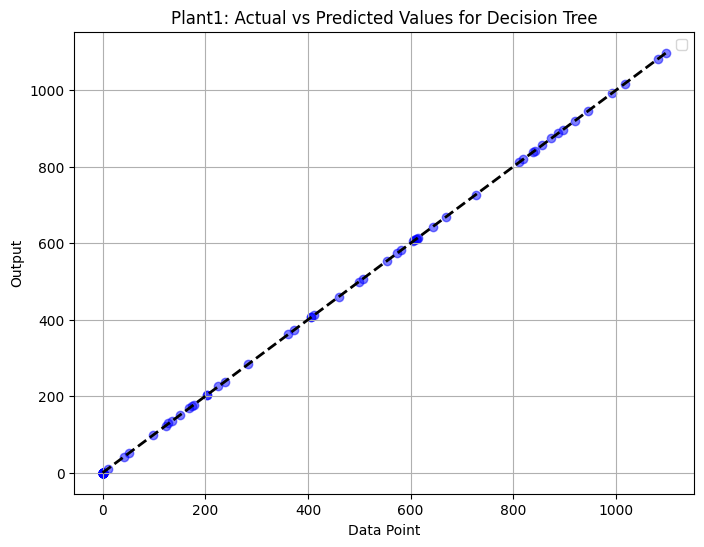

In [ ]:
import matplotlib.pyplot as plt
subset_size = 100
subset_y_test = y_test[:subset_size]
subset_predictions_dt = predictions_dt[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y_test, subset_predictions_dt, color='blue',alpha=0.5)
plt.plot([subset_y_test.min(), subset_y_test.max()], [subset_y_test.min(), subset_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant1: Actual vs Predicted Values for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


Plant2: Decision Tree
Mean Absolute Error (MAE): 0.140610601978032
Mean Squared Error (MSE): 0.21947378267223736
Root Mean Squared Error (RMSE): 0.4684802905910102
R-squared (R2): 0.9999983160662453


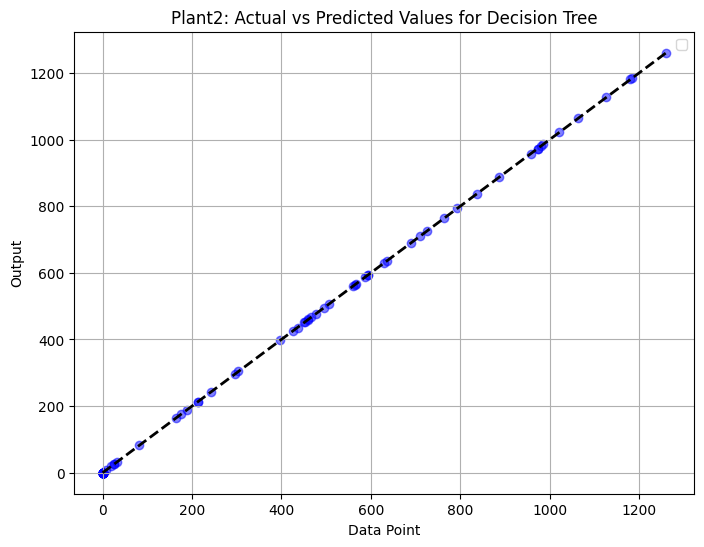

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X2 = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y2 = df2['AC_POWER']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X2_train, y2_train)

predictions_dt2 = decision_tree.predict(X2_test)

mae_dt2 = mean_absolute_error(y2_test, predictions_dt2)
mse_dt2 = mean_squared_error(y2_test, predictions_dt2)
rmse_dt2 = np.sqrt(mse_dt2)
r2_dt2 = r2_score(y2_test, predictions_dt2)

print("Plant2: Decision Tree")
print("Mean Absolute Error (MAE):", mae_dt2)
print("Mean Squared Error (MSE):", mse_dt2)
print("Root Mean Squared Error (RMSE):", rmse_dt2)
print("R-squared (R2):", r2_dt2)

subset_size = 100
subset_y2_test = y2_test[:subset_size]
subset_predictions_dt = predictions_dt2[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y2_test, subset_predictions_dt, color='blue',alpha=0.5)
plt.plot([subset_y2_test.min(), subset_y2_test.max()], [subset_y2_test.min(), subset_y2_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant2: Actual vs Predicted Values for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

predictions_rf = random_forest.predict(X_test)

mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, predictions_rf)

print("Plant1: Random Forest")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


Plant1: Random Forest
Mean Absolute Error (MAE): 0.1341295130320085
Mean Squared Error (MSE): 1.2218675029828194
Root Mean Squared Error (RMSE): 1.1053811573311803
R-squared (R2): 0.9999920814487108


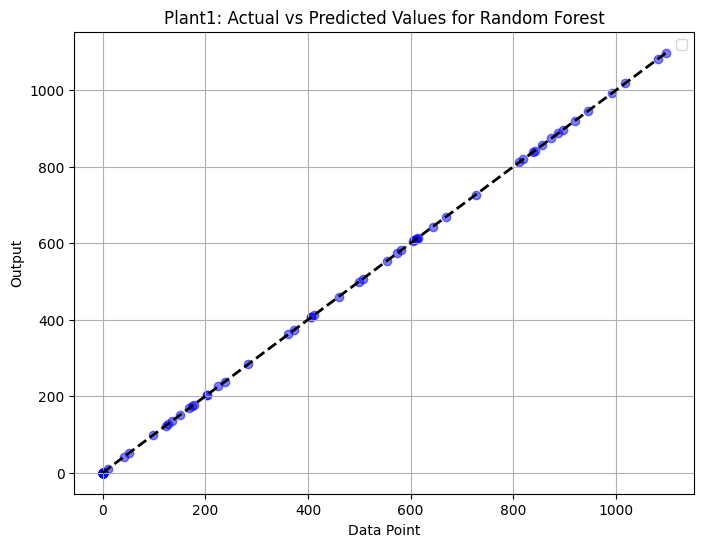

In [ ]:
subset_size = 100
subset_y_test = y_test[:subset_size]
subset_predictions_rf = predictions_rf[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y_test, subset_predictions_rf, color='blue',alpha=0.5)
plt.plot([subset_y_test.min(), subset_y_test.max()], [subset_y_test.min(), subset_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant1: Actual vs Predicted Values for Random Forest')
plt.legend()
plt.grid(True)
plt.show()


Plant1: Random Forest
Mean Absolute Error (MAE): 0.11703699906936933
Mean Squared Error (MSE): 0.1620187749544498
Root Mean Squared Error (RMSE): 0.4025155586489171
R-squared (R2): 0.9999987568953307


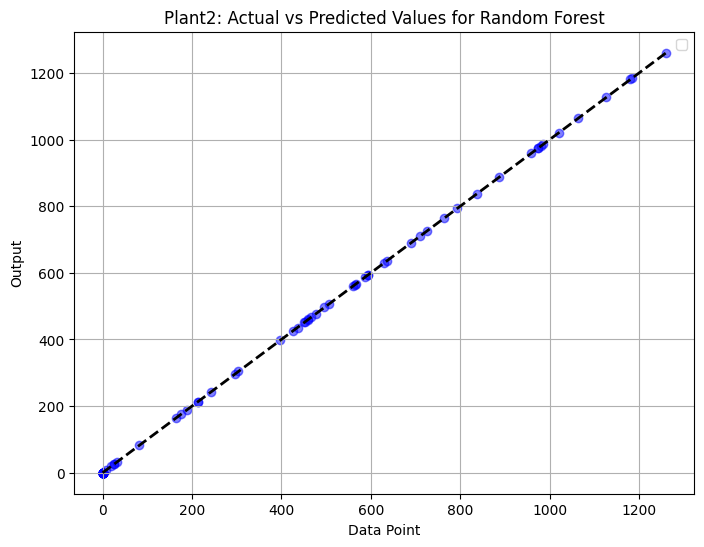

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X2_train, y2_train)

predictions_rf2 = random_forest.predict(X2_test)

mae_rf2 = mean_absolute_error(y2_test, predictions_rf2)
mse_rf2 = mean_squared_error(y2_test, predictions_rf2)
rmse_rf2 = np.sqrt(mse_rf2)
r2_rf2 = r2_score(y2_test, predictions_rf2)

print("Plant1: Random Forest")
print("Mean Absolute Error (MAE):", mae_rf2)
print("Mean Squared Error (MSE):", mse_rf2)
print("Root Mean Squared Error (RMSE):", rmse_rf2)
print("R-squared (R2):", r2_rf2)

subset_size = 100
subset_y2_test = y2_test[:subset_size]
subset_predictions_rf2 = predictions_rf2[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y2_test, subset_predictions_rf2, color='blue',alpha=0.5)
plt.plot([subset_y2_test.min(), subset_y2_test.max()], [subset_y2_test.min(), subset_y2_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant2: Actual vs Predicted Values for Random Forest')
plt.legend()
plt.grid(True)
plt.show()


**Reccurent Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y, test_size=0.3, random_state=42)

model = Sequential([
    LSTM(units=50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_rnn, y_train_rnn, epochs=100, batch_size=32, validation_split=0.2)

predictions_rnn = model.predict(X_test_rnn)

mae_rnn = mean_absolute_error(y_test_rnn, predictions_rnn)
mse_rnn = mean_squared_error(y_test_rnn, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test_rnn, predictions_rnn)

print("Recurrent Neural Network Metrics:")
print("Mean Absolute Error (MAE):", mae_rnn)
print("Mean Squared Error (MSE):", mse_rnn)
print("Root Mean Squared Error (RMSE):", rmse_rnn)
print("R-squared (R2):", r2_rnn)


Epoch 1/100
1204/1204 [==============================] - 11s 7ms/step - loss: 232417.6875 - val_loss: 216775.7656
Epoch 2/100
1204/1204 [==============================] - 6s 5ms/step - loss: 203535.2812 - val_loss: 191574.2188
Epoch 3/100
1204/1204 [==============================] - 6s 5ms/step - loss: 178891.9844 - val_loss: 168597.3906
Epoch 4/100
1204/1204 [==============================] - 6s 5ms/step - loss: 157658.3438 - val_loss: 148692.9688
Epoch 5/100
1204/1204 [==============================] - 7s 6ms/step - loss: 138912.9375 - val_loss: 130955.5234
Epoch 6/100
1204/1204 [==============================] - 6s 5ms/step - loss: 122105.6875 - val_loss: 114925.3203
Epoch 7/100
1204/1204 [==============================] - 7s 5ms/step - loss: 106861.0859 - val_loss: 100330.9844
Epoch 8/100
1204/1204 [==============================] - 6s 5ms/step - loss: 93029.9688 - val_loss: 87130.6719
Epoch 9/100
1204/1204 [==============================] - 8s 7ms/step - loss: 80556.6406 - val_los

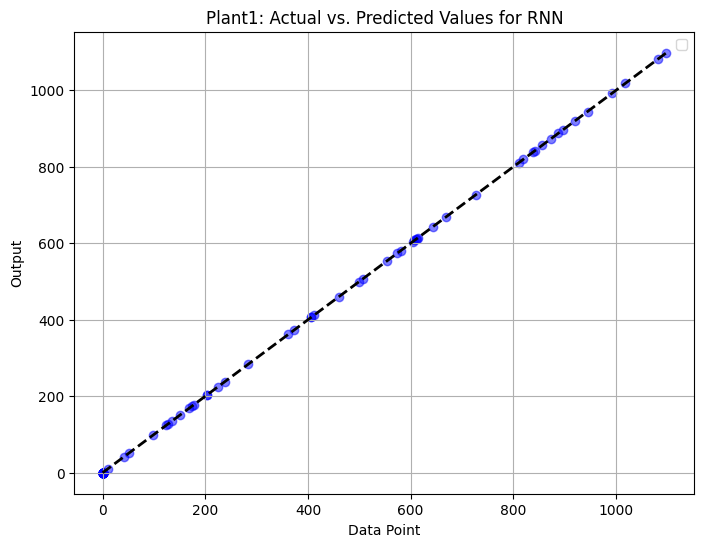

In [ ]:
subset_size = 100
subset_y_test = y_test[:subset_size]
subset_predictions_rnn = predictions_rnn[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y_test, subset_predictions_rnn, color='blue',alpha=0.5)
plt.plot([subset_y_test.min(), subset_y_test.max()], [subset_y_test.min(), subset_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant1: Actual vs Predicted Values for RNN')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)

X2_rnn = X2_scaled.reshape((X2_scaled.shape[0], 1, X2_scaled.shape[1]))

X2_train_rnn, X2_test_rnn, y2_train_rnn, y2_test_rnn = train_test_split(X2_rnn, y2, test_size=0.2, random_state=42)

model2 = Sequential([
    LSTM(units=50, input_shape=(X2_train_rnn.shape[1], X2_train_rnn.shape[2])),
    Dense(1)
])

model2.compile(optimizer='adam', loss='mse')

history = model2.fit(X2_train_rnn, y2_train_rnn, epochs=100, batch_size=32, validation_split=0.2)

predictions_rnn2 = model2.predict(X2_test_rnn)

mae_rnn = mean_absolute_error(y2_test_rnn, predictions_rnn2)
mse_rnn = mean_squared_error(y2_test_rnn, predictions_rnn2)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y2_test_rnn, predictions_rnn2)

print("Recurrent Neural Network Metrics")
print("Mean Absolute Error (MAE):", mae_rnn)
print("Mean Squared Error (MSE):", mse_rnn)
print("Root Mean Squared Error (RMSE):", rmse_rnn)
print("R-squared (R2):", r2_rnn)



Epoch 1/100
1354/1354 [==============================] - 10s 6ms/step - loss: 174372.7188 - val_loss: 158444.5781
Epoch 2/100
1354/1354 [==============================] - 7s 5ms/step - loss: 150493.8438 - val_loss: 137436.5156
Epoch 3/100
1354/1354 [==============================] - 7s 5ms/step - loss: 130711.7031 - val_loss: 119981.5391
Epoch 4/100
1354/1354 [==============================] - 7s 5ms/step - loss: 114617.4531 - val_loss: 105390.0000
Epoch 5/100
1354/1354 [==============================] - 8s 6ms/step - loss: 101080.0078 - val_loss: 92735.0391
Epoch 6/100
1354/1354 [==============================] - 7s 5ms/step - loss: 88504.6719 - val_loss: 80597.2266
Epoch 7/100
1354/1354 [==============================] - 8s 6ms/step - loss: 75204.6016 - val_loss: 67139.5156
Epoch 8/100
1354/1354 [==============================] - 7s 5ms/step - loss: 63046.6992 - val_loss: 56618.0742
Epoch 9/100
1354/1354 [==============================] - 7s 6ms/step - loss: 53125.6328 - val_loss: 47

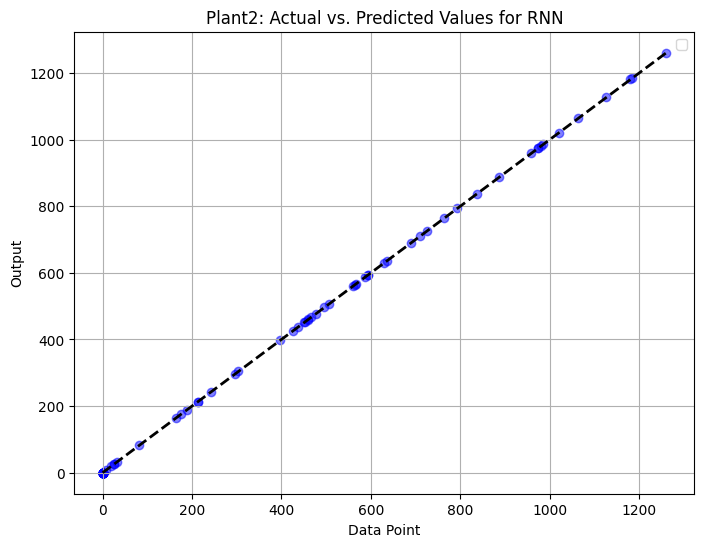

In [ ]:
subset_size = 100
subset_y2_test = y2_test[:subset_size]
subset_predictions_rnn2 = predictions_rnn2[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y2_test, subset_predictions_rnn2, color='blue',alpha=0.5)

plt.plot([subset_y2_test.min(), subset_y2_test.max()], [subset_y2_test.min(), subset_y2_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant2: Actual vs Predicted Values for RNN')
plt.legend()
plt.grid(True)
plt.show()

**LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = df[['DAILY_YIELD', 'TOTAL_YIELD','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','DC_POWER']]
y= df['AC_POWER']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.3, random_state=42)

model_lstm = Sequential([
    LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32, validation_split=0.2)

predictions_lstm = model_lstm.predict(X_test_lstm)

mae_lstm = mean_absolute_error(y_test_lstm, predictions_lstm)
mse_lstm = mean_squared_error(y_test_lstm, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, predictions_lstm)

print("LSTM Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)


Epoch 1/100
1204/1204 [==============================] - 14s 7ms/step - loss: 232383.4375 - val_loss: 216784.6562
Epoch 2/100
1204/1204 [==============================] - 6s 5ms/step - loss: 203513.1719 - val_loss: 191502.0938
Epoch 3/100
1204/1204 [==============================] - 6s 5ms/step - loss: 178853.9062 - val_loss: 168579.8594
Epoch 4/100
1204/1204 [==============================] - 5s 4ms/step - loss: 157665.0312 - val_loss: 148721.9219
Epoch 5/100
1204/1204 [==============================] - 6s 5ms/step - loss: 138923.0625 - val_loss: 130941.9766
Epoch 6/100
1204/1204 [==============================] - 5s 4ms/step - loss: 122085.7969 - val_loss: 114885.5781
Epoch 7/100
1204/1204 [==============================] - 5s 4ms/step - loss: 106828.4766 - val_loss: 100278.4141
Epoch 8/100
1204/1204 [==============================] - 6s 5ms/step - loss: 93010.3828 - val_loss: 87124.4375
Epoch 9/100
1204/1204 [==============================] - 5s 4ms/step - loss: 80548.8750 - val_los

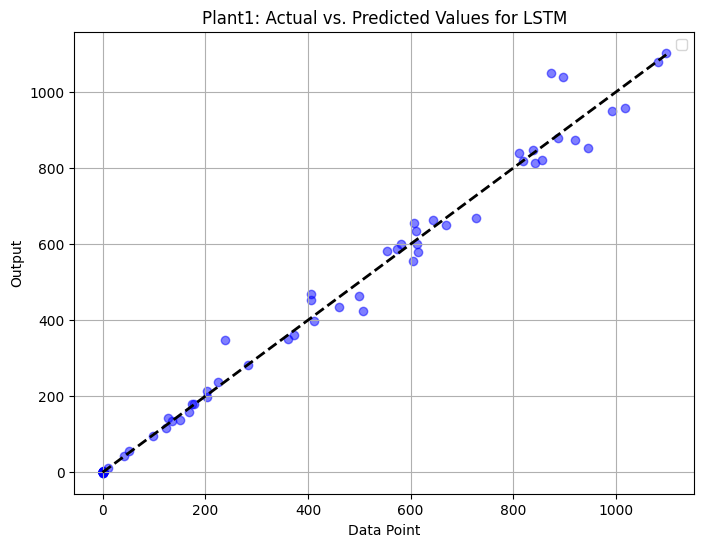

In [ ]:
subset_size = 100
subset_y_test = y_test[:subset_size]
subset_predictions_lstm = predictions_lstm[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y_test, subset_predictions_lstm, color='blue',alpha=0.5)
plt.plot([subset_y_test.min(), subset_y_test.max()], [subset_y_test.min(), subset_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant1: Actual vs Predicted Values for LSTM')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X2 = df2[['DAILY_YIELD', 'TOTAL_YIELD','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','DC_POWER']]
y2= df2['AC_POWER']

scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)

X2_lstm = X2_scaled.reshape((X2_scaled.shape[0], 1, X2_scaled.shape[1]))

X2_train_lstm, X2_test_lstm, y2_train_lstm, y2_test_lstm = train_test_split(X2_lstm, y2, test_size=0.2, random_state=42)

model2_lstm = Sequential([
    LSTM(units=50, input_shape=(X2_train_lstm.shape[1], X2_train_lstm.shape[2])),
    Dense(1)
])

model2_lstm.compile(optimizer='adam', loss='mse')

history_lstm = model2_lstm.fit(X2_train_lstm, y2_train_lstm, epochs=100, batch_size=32, validation_split=0.2)

predictions2_lstm = model2_lstm.predict(X2_test_lstm)

mae_lstm = mean_absolute_error(y2_test_lstm, predictions2_lstm)
mse_lstm = mean_squared_error(y2_test_lstm, predictions2_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y2_test_lstm, predictions2_lstm)

print("LSTM Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("R-squared (R2):", r2_lstm)


Epoch 1/100
1354/1354 [==============================] - 10s 6ms/step - loss: 174709.2969 - val_loss: 158849.1875
Epoch 2/100
1354/1354 [==============================] - 6s 4ms/step - loss: 150897.1406 - val_loss: 137872.4062
Epoch 3/100
1354/1354 [==============================] - 7s 5ms/step - loss: 131203.8750 - val_loss: 120454.8906
Epoch 4/100
1354/1354 [==============================] - 5s 4ms/step - loss: 115068.8516 - val_loss: 105816.1328
Epoch 5/100
1354/1354 [==============================] - 6s 5ms/step - loss: 101424.2266 - val_loss: 93200.3984
Epoch 6/100
1354/1354 [==============================] - 5s 4ms/step - loss: 88903.1016 - val_loss: 80342.4297
Epoch 7/100
1354/1354 [==============================] - 5s 4ms/step - loss: 75447.7500 - val_loss: 67702.1328
Epoch 8/100
1354/1354 [==============================] - 6s 5ms/step - loss: 63494.8672 - val_loss: 57002.7188
Epoch 9/100
1354/1354 [==============================] - 6s 4ms/step - loss: 53432.8672 - val_loss: 47

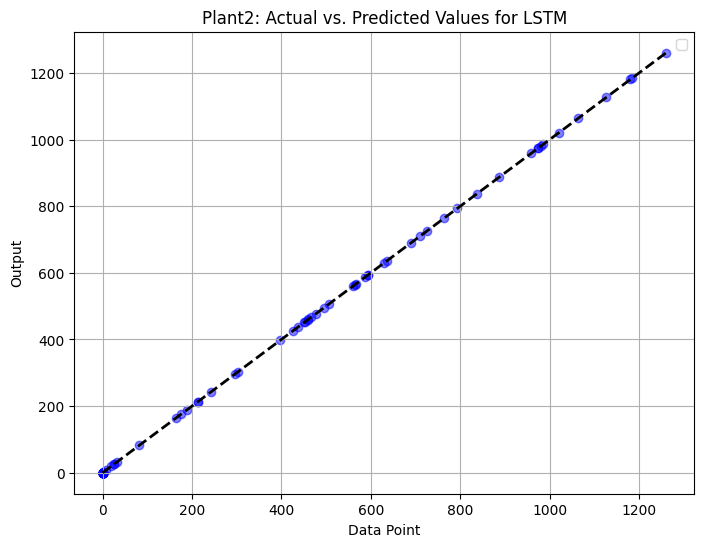

In [ ]:
subset_size = 100
subset_y2_test = y2_test[:subset_size]
subset_predictions2_lstm = predictions2_lstm[:subset_size]

plt.figure(figsize=(8, 6))
plt.scatter(subset_y2_test, subset_predictions2_lstm, color='blue',alpha=0.5)
plt.plot([subset_y2_test.min(), subset_y2_test.max()], [subset_y2_test.min(), subset_y2_test.max()], 'k--', lw=2)
plt.xlabel('Actual Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Plant2: Actual vs. Predicted Values for LSTM')
plt.legend()
plt.grid(True)
plt.show()


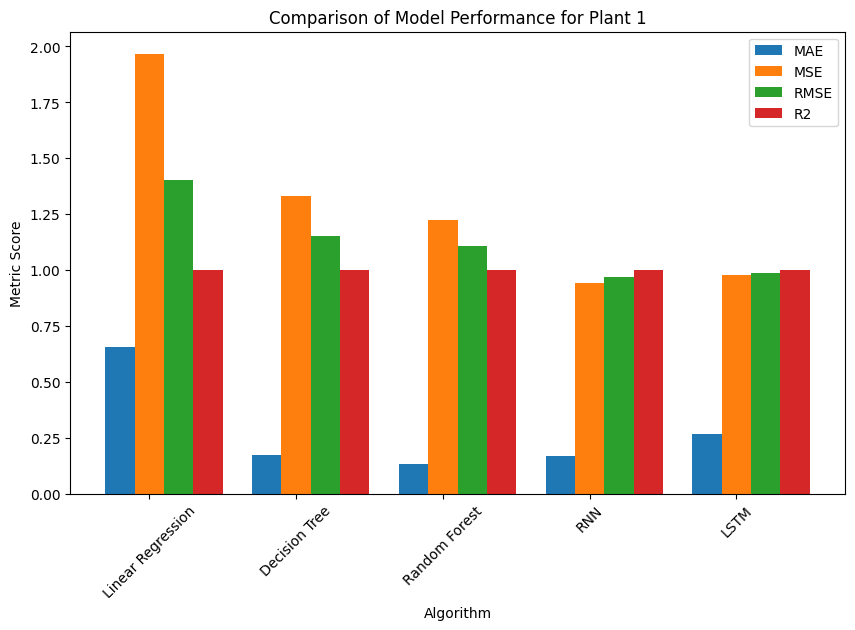

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# metric scores
metric_scores = {
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest', 'RNN', 'LSTM'],
    'MAE': [0.6556119470983207, 0.17096348659382035, 0.1341295130320085, 0.166075445578, 0.264427069160],
    'MSE': [1.9678872312912947, 1.3304654053969567, 1.2218675029828194, 0.939859636673, 0.975407088282],
    'RMSE': [1.4028140401675822, 1.1534580206478937, 1.1053811573311803, 0.9694635819221, 0.987626998559],
    'R2': [0.9999872467219774, 0.9999913776587679, 0.9999920814487108, 0.999993898589, 0.9999936678215],
}

# Creating a DataFrame from the metric scores
df_scores = pd.DataFrame(metric_scores)

# Set the algorithm column as the index
df_scores.set_index('Algorithm', inplace=True)

# Plot the metric scores
plt.figure(figsize=(10, 6))

# Get the algorithm names as x-axis ticks
x_ticks = np.arange(len(df_scores.index))

# Loop through each metric and plot a grouped bar plot
bar_width = 0.2
for i, metric in enumerate(df_scores.columns):
    plt.bar(x_ticks + i * bar_width, df_scores[metric], width=bar_width, label=metric)

# Set x-axis ticks and labels
plt.xticks(x_ticks + bar_width, df_scores.index)

plt.title('Comparison of Model Performance for Plant 1')
plt.xlabel('Algorithm')
plt.ylabel('Metric Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


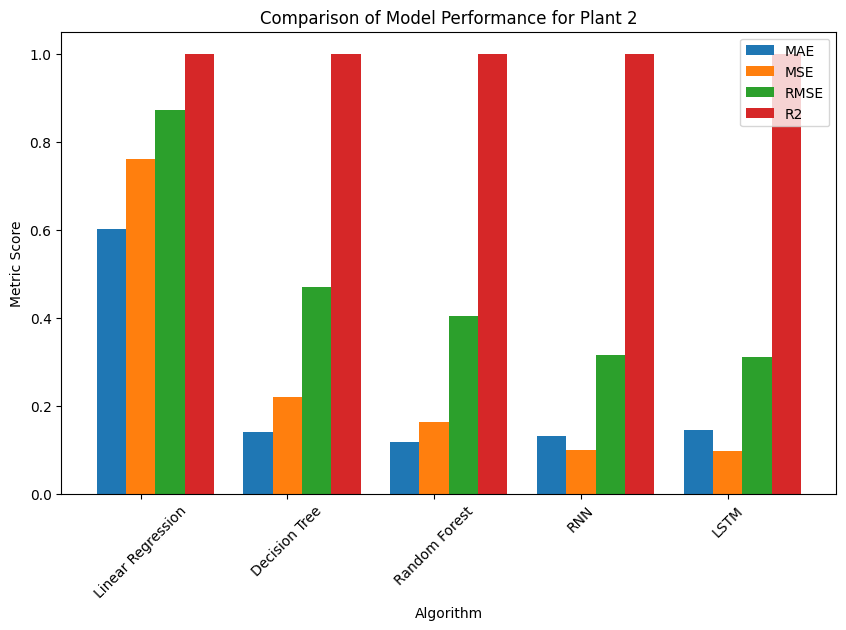

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example metric scores (replace these with your actual scores)
metric_scores = {
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest', 'RNN', 'LSTM'],
    'MAE': [0.6009896648520529, 0.140610601978032, 0.11703699906936933, 0.13172618217236, 0.1438615683373],
    'MSE': [0.7596204845092597, 0.21947378267223736, 0.1620187749544498, 0.099004509324, 0.096995682785],
    'RMSE': [0.8715620944655978, 0.4684802905910102, 0.4025155586489171, 0.314649820156, 0.3114412991000],
    'R2': [0.9999941717386057, 0.9999983160662453, 0.9999987568953307, 0.999999240378, 0.9999992557912],
}

# Create a DataFrame from the metric scores
df_scores = pd.DataFrame(metric_scores)

# Set the algorithm column as the index
df_scores.set_index('Algorithm', inplace=True)

# Plot the metric scores
plt.figure(figsize=(10, 6))

# Get the algorithm names as x-axis ticks
x_ticks = np.arange(len(df_scores.index))

# Loop through each metric and plot a grouped bar plot
bar_width = 0.2
for i, metric in enumerate(df_scores.columns):
    plt.bar(x_ticks + i * bar_width, df_scores[metric], width=bar_width, label=metric)

# Set x-axis ticks and labels
plt.xticks(x_ticks + bar_width, df_scores.index)

plt.title('Comparison of Model Performance for Plant 2')
plt.xlabel('Algorithm')
plt.ylabel('Metric Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Plant1: RNN Prediction Analysis**

In [ ]:
testing_data = pd.concat([X_test, y_test], axis=1)

# Display the testing data as a table
print("Testing Data:")
print(testing_data)

Testing Data:
       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
48910  5827.625000  7173051.625            30.200903           51.813019   
45151  6542.000000  6355099.000            23.801898           23.067796   
17954  1122.285714  7244342.286            27.404045           41.316923   
51959     0.000000  7304204.000            22.775156           20.823775   
53225  5526.000000  7408342.000            26.491622           29.685520   
...            ...          ...                  ...                 ...   
54532     0.000000  7369294.000            21.764787           20.289380   
45143  6316.142857  7770456.143            24.031464           23.445373   
15101     0.000000  7064219.000            22.361055           20.863080   
11405  8982.000000  7248524.000            27.112100           24.688795   
12052  2425.285714  7212623.286            28.854165           51.797288   

       IRRADIATION      DC_POWER     AC_POWER  
48910     0.823869   8937

In [ ]:
testing_data_with_predictions = testing_data.copy()

# Adding Predicted_AC_POWER column to testing data
testing_data_with_predictions['Predicted_AC_POWER'] = predictions_rnn

# Adding DATE and TIME columns
testing_data_with_predictions['DATE'] = mergedata1['DATE']
testing_data_with_predictions['TIME'] = mergedata1['TIME']

print(testing_data_with_predictions)

       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
48910  5827.625000  7173051.625            30.200903           51.813019   
45151  6542.000000  6355099.000            23.801898           23.067796   
17954  1122.285714  7244342.286            27.404045           41.316923   
51959     0.000000  7304204.000            22.775156           20.823775   
53225  5526.000000  7408342.000            26.491622           29.685520   
...            ...          ...                  ...                 ...   
54532     0.000000  7369294.000            21.764787           20.289380   
45143  6316.142857  7770456.143            24.031464           23.445373   
15101     0.000000  7064219.000            22.361055           20.863080   
11405  8982.000000  7248524.000            27.112100           24.688795   
12052  2425.285714  7212623.286            28.854165           51.797288   

       IRRADIATION      DC_POWER     AC_POWER  Predicted_AC_POWER        DATE  \
48910 

In [ ]:
#Inspecting unique dates present in the DataFrame
unique_dates = testing_data_with_predictions['DATE'].unique()
print("Unique Dates in DataFrame:")
print(unique_dates)

Unique Dates in DataFrame:
[datetime.date(2020, 6, 8) datetime.date(2020, 6, 6)
 datetime.date(2020, 5, 24) datetime.date(2020, 6, 10)
 datetime.date(2020, 5, 30) datetime.date(2020, 6, 1)
 datetime.date(2020, 6, 17) datetime.date(2020, 6, 13)
 datetime.date(2020, 5, 28) datetime.date(2020, 5, 18)
 datetime.date(2020, 5, 29) datetime.date(2020, 5, 26)
 datetime.date(2020, 5, 19) datetime.date(2020, 6, 15)
 datetime.date(2020, 6, 5) datetime.date(2020, 5, 17)
 datetime.date(2020, 6, 2) datetime.date(2020, 6, 7)
 datetime.date(2020, 5, 23) datetime.date(2020, 5, 25)
 datetime.date(2020, 6, 4) datetime.date(2020, 5, 15)
 datetime.date(2020, 6, 12) datetime.date(2020, 5, 20)
 datetime.date(2020, 6, 16) datetime.date(2020, 6, 3)
 datetime.date(2020, 5, 31) datetime.date(2020, 6, 14)
 datetime.date(2020, 5, 16) datetime.date(2020, 5, 27)
 datetime.date(2020, 6, 11) datetime.date(2020, 5, 21)
 datetime.date(2020, 6, 9) datetime.date(2020, 5, 22)]


In [ ]:
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)


Matching Rows:
      DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
110      0.000000  7158964.000            24.536092           21.968571   
1931  5965.000000  7122116.000            22.057080           21.072276   
441      0.000000  7016832.000            24.177106           22.551908   
1219  4338.428571  7184304.429            33.763185           49.803904   
1213  4354.000000  6187999.000            33.763185           49.803904   
...           ...          ...                  ...                 ...   
1483  6157.250000  7186123.250            33.443314           36.826704   
173      0.000000  7602960.000            24.936930           23.026113   
680    222.500000  6782820.500            25.216180           29.547111   
651    162.857143  6316965.857            24.988790           29.605644   
1670  5707.000000  6322510.000            27.097548           25.200846   

      IRRADIATION      DC_POWER     AC_POWER  Predicted_AC_POWER        DATE  \
110 

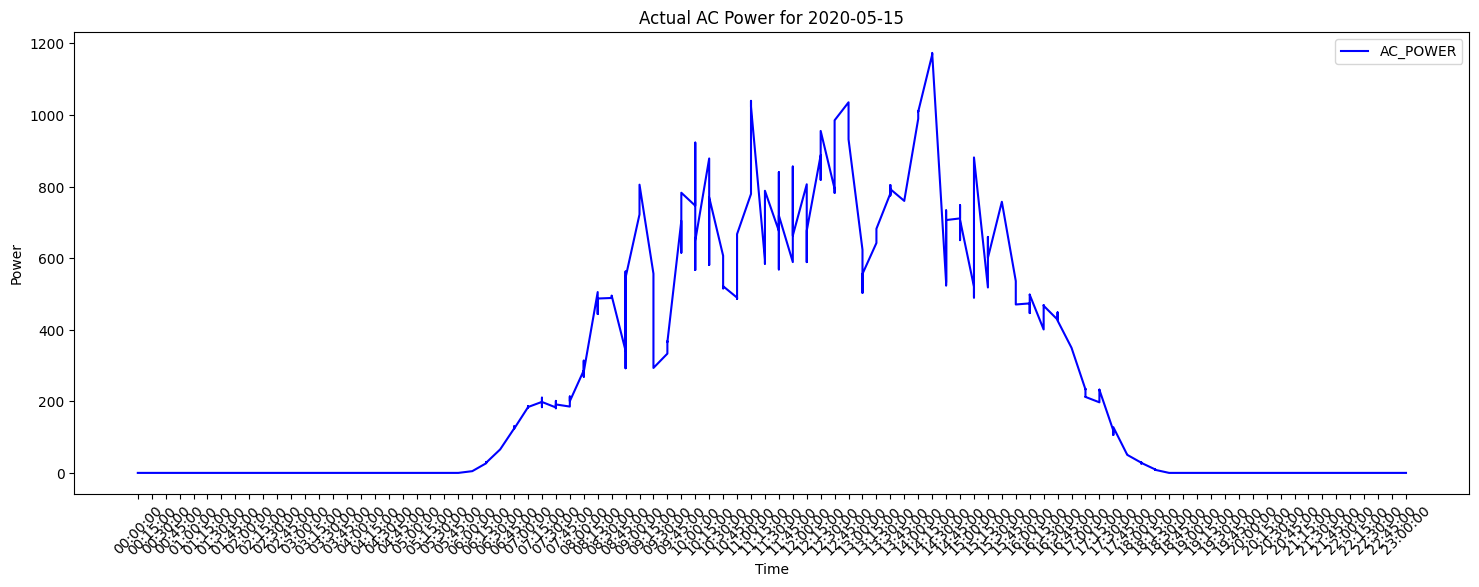

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER', color='blue')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

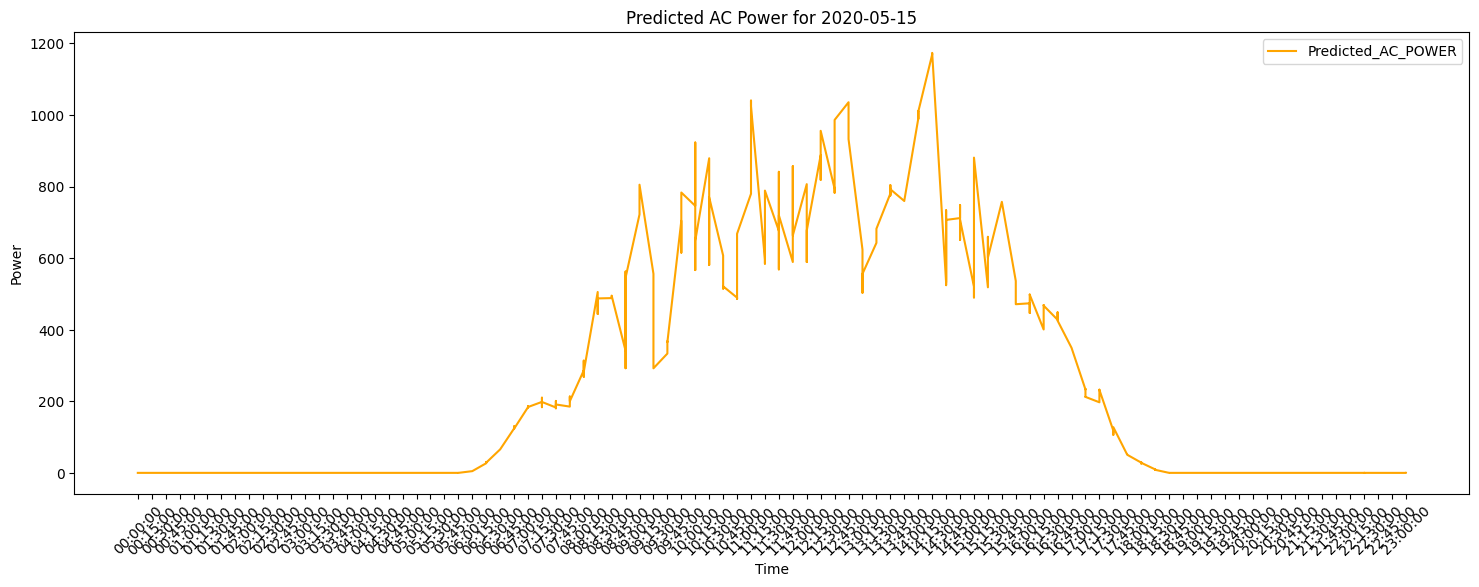

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER', color='orange')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

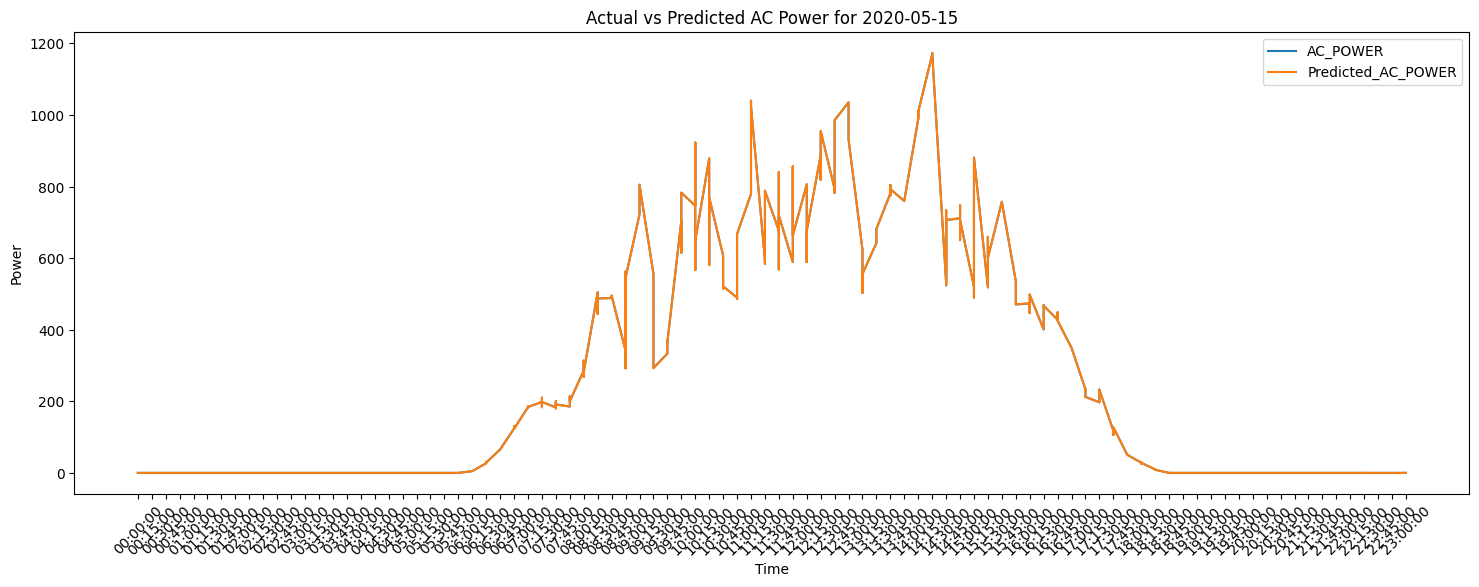

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
chosen_date='2020-05-25'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)


Matching Rows:
       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
20788  8748.857143  7098099.857            29.405579           28.884994   
19690     0.000000  6346131.000            23.358256           21.581388   
20318  5206.142857  6600962.143            32.367925           60.752540   
19452     0.000000  7241707.000            23.723102           22.517548   
20767  8819.875000  7120671.875            30.906561           30.832251   
...            ...          ...                  ...                 ...   
20415  6321.142857  7118173.143            33.481958           59.384025   
20643  8627.571429  7683868.571            33.705119           39.091504   
20399  6507.428571  6263987.429            33.481958           59.384025   
20755  8989.375000  7289501.375            30.906561           30.832251   
20640  8127.714286  6336067.714            33.705119           39.091504   

       IRRADIATION      DC_POWER     AC_POWER  Predicted_AC_POWER       

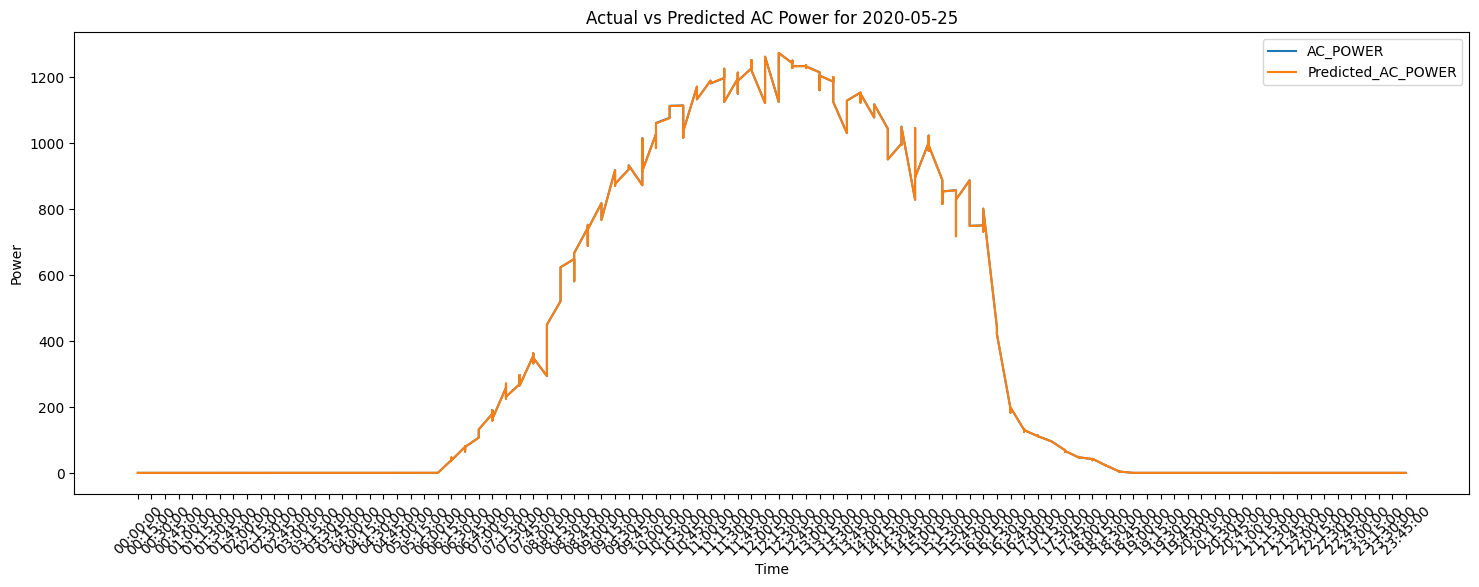

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-25'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
chosen_date='2020-06-05'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)

Matching Rows:
       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
42081       68.500  6460254.500            22.578601           23.143766   
42787     5901.875  6342920.875            29.944322           51.733781   
42728     5339.000  6497918.000            28.863662           49.925148   
43170        0.000  6438428.000            24.567763           21.854594   
42605     4037.250  7338923.250            24.986578           35.383199   
...            ...          ...                  ...                 ...   
42395     2104.750  7196639.750            27.469006           45.763782   
42251      918.000  7364739.000            26.108185           44.455601   
41620        0.000  7334000.000            21.935836           19.157507   
41960        0.000  6405380.000            21.663993           19.751652   
42593     4069.000  7198604.000            23.833673           27.069179   

       IRRADIATION     DC_POWER    AC_POWER  Predicted_AC_POWER        D

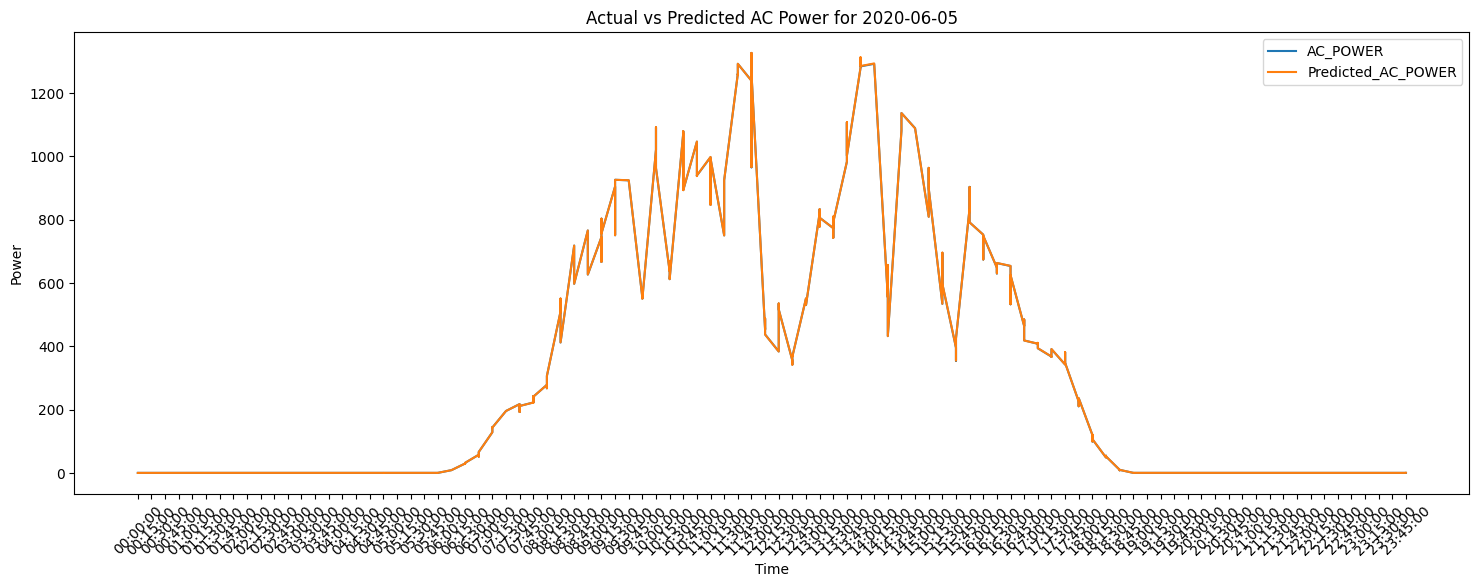

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-06-05'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
chosen_date='2020-06-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)

Matching Rows:
       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
62640     0.000000  7389358.000            22.161109           21.202299   
63568  4046.142857  6755793.143            28.851656           44.184163   
62846     0.000000  7407224.000            22.168748           21.519651   
64236  6728.000000  7249539.000            23.201117           22.128701   
64433  6732.000000  7344704.000            22.975063           21.049390   
...            ...          ...                  ...                 ...   
63124   155.250000  7389513.250            23.271853           27.688371   
63973  6640.571429  7274477.571            27.169900           33.850057   
64054  6881.500000  6511967.500            26.740639           29.026457   
63160   192.750000  7009890.750            23.458431           27.546588   
63596  4152.571429  7400574.571            28.546293           39.752722   

       IRRADIATION     DC_POWER    AC_POWER  Predicted_AC_POWER        D

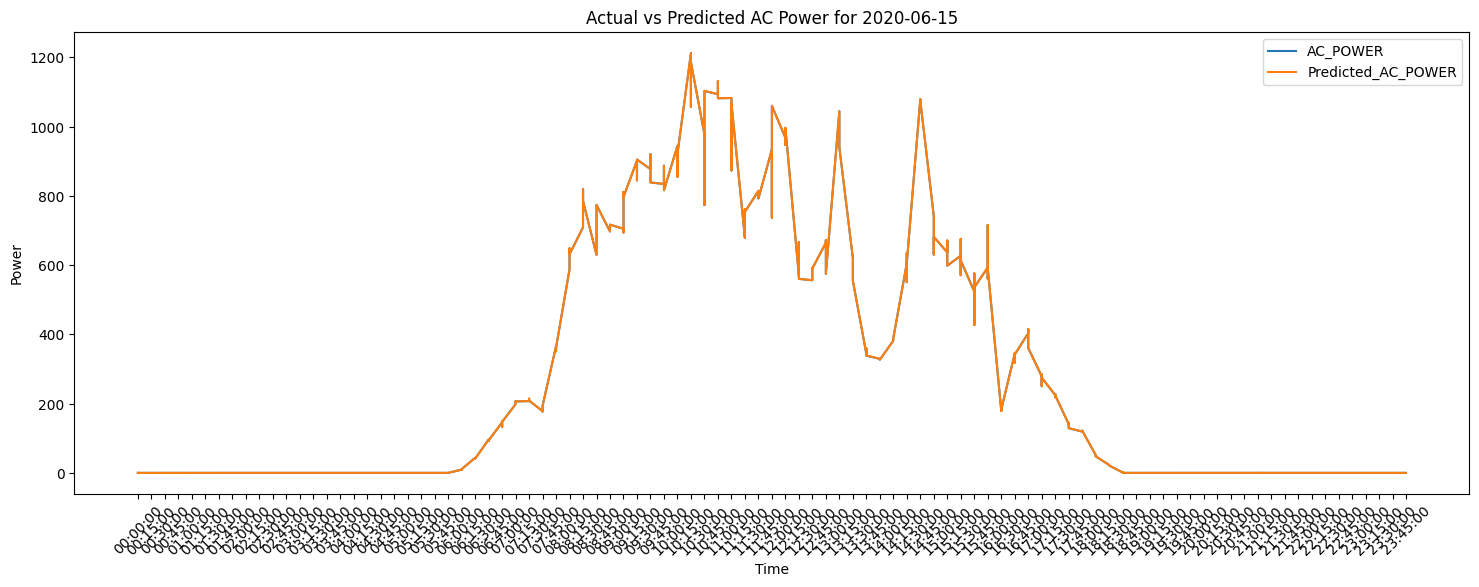

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-06-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-24-e4b1a7ff99dd>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-e4b1a7ff99dd>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-e4b1a7ff99dd>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-e4b1a7ff99dd>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-e4b1a7ff99dd>:25: FutureWarning: The frame.app

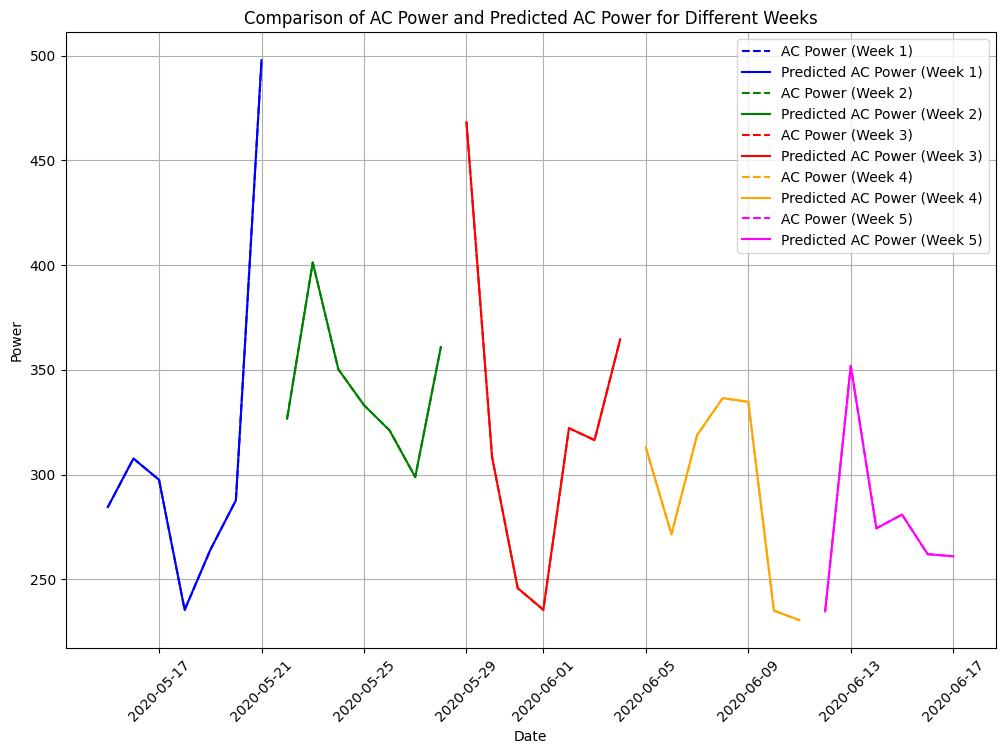

In [ ]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

weeks_to_compare = [
    (datetime.date(2020, 5, 15), datetime.date(2020, 5, 21)),
    (datetime.date(2020, 5, 22), datetime.date(2020, 5, 28)),
    (datetime.date(2020, 5, 29), datetime.date(2020, 6, 4)),
    (datetime.date(2020, 6, 5), datetime.date(2020, 6,11)),
    (datetime.date(2020, 6, 12), datetime.date(2020, 6,17)),
]

colors = ['blue', 'green', 'red', 'orange', 'magenta']

aggregated_data = pd.DataFrame(columns=['DATE', 'AC_POWER', 'Predicted_AC_POWER'])

for i, (start_date, end_date) in enumerate(weeks_to_compare):
    # Filter the testing data for the selected week
    week_data = testing_data_with_predictions[(testing_data_with_predictions['DATE'] >= start_date) & (testing_data_with_predictions['DATE'] <= end_date)]

    # Aggregate AC power and predicted AC power over time for each date
    week_aggregated_data = week_data.groupby('DATE')[['AC_POWER', 'Predicted_AC_POWER']].mean().reset_index()

    # Append aggregated data for the current week to the main DataFrame
    aggregated_data = aggregated_data.append(week_aggregated_data)

# Plotting AC power and predicted AC power for each week
plt.figure(figsize=(12, 8))
legend_labels = []
legend_handles = []
for i, (start_date, end_date) in enumerate(weeks_to_compare):
    week_label = f'Week {i+1}'
    week_data = aggregated_data[(aggregated_data['DATE'] >= start_date) & (aggregated_data['DATE'] <= end_date)]
    ac_power_handle, = plt.plot(week_data['DATE'], week_data['AC_POWER'], linestyle='--', color=colors[i])
    predicted_ac_power_handle, = plt.plot(week_data['DATE'], week_data['Predicted_AC_POWER'], color=colors[i])
    legend_labels.extend([f'AC Power ({week_label})', f'Predicted AC Power ({week_label})'])
    legend_handles.extend([ac_power_handle, predicted_ac_power_handle])

plt.xlabel('Date')
plt.ylabel('Power')
plt.title('Comparison of AC Power and Predicted AC Power for Different Weeks')
plt.legend(legend_handles, legend_labels)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


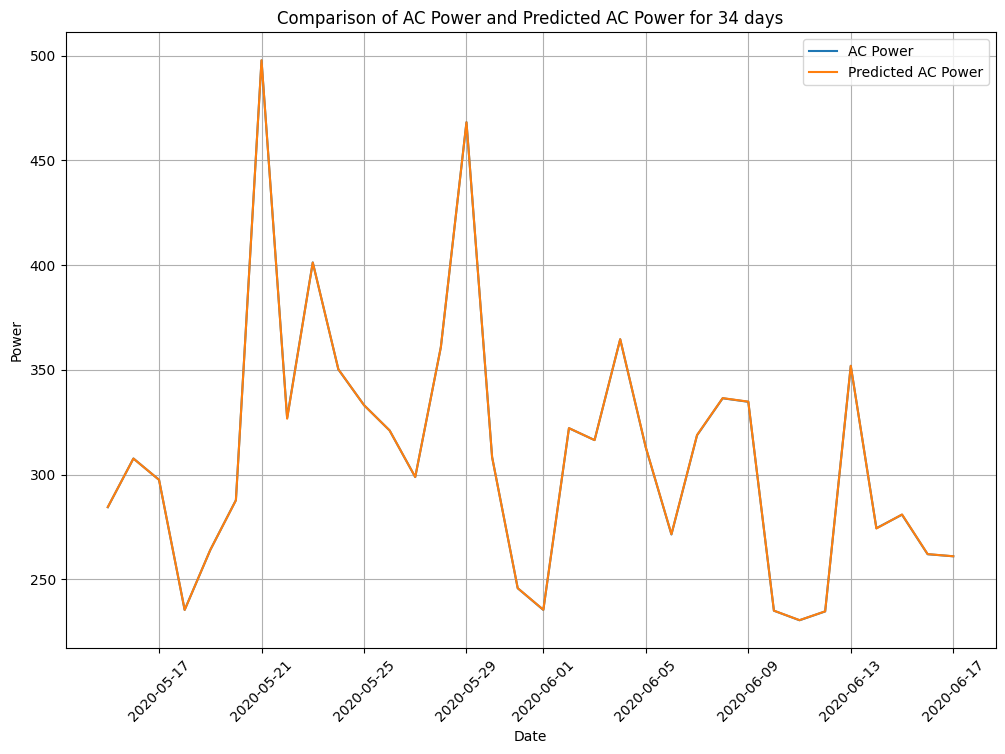

In [ ]:
import matplotlib.pyplot as plt

start_date = datetime.date(2020, 5, 15)
end_date = datetime.date(2020, 6, 17)

whole_data = testing_data_with_predictions[(testing_data_with_predictions['DATE'] >= start_date) & (testing_data_with_predictions['DATE'] <= end_date)]

# Aggregate AC power and predicted AC power over time for each date
whole_aggregated_data = whole_data.groupby('DATE')[['AC_POWER', 'Predicted_AC_POWER']].mean().reset_index()

# Plotting AC power and predicted AC power for the selected time period
plt.figure(figsize=(12, 8))
plt.plot(week_aggregated_data['DATE'], week_aggregated_data['AC_POWER'], label='AC Power')
plt.plot(week_aggregated_data['DATE'], week_aggregated_data['Predicted_AC_POWER'], label='Predicted AC Power')
plt.xlabel('Date')
plt.ylabel('Power')
plt.title('Comparison of AC Power and Predicted AC Power for 34 days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Plant2: LSTM Prediction Analysis**

In [ ]:
testing_data = pd.concat([X2_test, y2_test], axis=1)

# Display the testing data as a table
print("Testing Data:")
print(testing_data)

Testing Data:
       DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
24788  2079.214286  2.307958e+06            30.268161           48.527451   
64465  2209.600000  1.215478e+09            28.543546           38.457275   
5862   7220.000000  8.384430e+08            32.505663           30.871879   
13626  4844.000000  3.741710e+05            26.574942           24.570593   
42307  3421.000000  2.356529e+06            24.566194           22.658557   
...            ...           ...                  ...                 ...   
43180   913.000000  1.412239e+09            28.780703           45.031092   
21041     1.733333  1.708156e+09            23.248244           21.408767   
55818   524.266667  2.628770e+06            25.586731           30.660331   
28035     0.000000  1.783300e+06            23.838063           22.527732   
38455  4387.000000  4.562610e+05            23.351942           21.986277   

       IRRADIATION     DC_POWER     AC_POWER  
24788     0.81

In [ ]:
testing_data_with_predictions = testing_data.copy()

# Adding Predicted_AC_POWER column to testing data
testing_data_with_predictions['Predicted_AC_POWER'] = predictions2_lstm

# Adding DATE and TIME columns
testing_data_with_predictions['DATE'] = mergedata2['DATE']
testing_data_with_predictions['TIME'] = mergedata2['TIME']

print(testing_data_with_predictions)

       DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
24788  2079.214286  2.307958e+06            30.268161           48.527451   
64465  2209.600000  1.215478e+09            28.543546           38.457275   
5862   7220.000000  8.384430e+08            32.505663           30.871879   
13626  4844.000000  3.741710e+05            26.574942           24.570593   
42307  3421.000000  2.356529e+06            24.566194           22.658557   
...            ...           ...                  ...                 ...   
43180   913.000000  1.412239e+09            28.780703           45.031092   
21041     1.733333  1.708156e+09            23.248244           21.408767   
55818   524.266667  2.628770e+06            25.586731           30.660331   
28035     0.000000  1.783300e+06            23.838063           22.527732   
38455  4387.000000  4.562610e+05            23.351942           21.986277   

       IRRADIATION     DC_POWER     AC_POWER  Predicted_AC_POWER        DAT

In [ ]:
#Inspecting unique dates present in the DataFrame
unique_dates = testing_data_with_predictions['DATE'].unique()
print("Unique Dates in DataFrame:")
print(unique_dates)

Unique Dates in DataFrame:
[datetime.date(2020, 5, 28) datetime.date(2020, 6, 16)
 datetime.date(2020, 5, 17) datetime.date(2020, 5, 21)
 datetime.date(2020, 6, 5) datetime.date(2020, 5, 24)
 datetime.date(2020, 6, 6) datetime.date(2020, 6, 3)
 datetime.date(2020, 5, 23) datetime.date(2020, 6, 10)
 datetime.date(2020, 6, 12) datetime.date(2020, 6, 9)
 datetime.date(2020, 5, 20) datetime.date(2020, 5, 22)
 datetime.date(2020, 5, 31) datetime.date(2020, 6, 8)
 datetime.date(2020, 5, 15) datetime.date(2020, 6, 15)
 datetime.date(2020, 5, 25) datetime.date(2020, 5, 27)
 datetime.date(2020, 6, 13) datetime.date(2020, 6, 14)
 datetime.date(2020, 6, 1) datetime.date(2020, 6, 17)
 datetime.date(2020, 6, 11) datetime.date(2020, 6, 2)
 datetime.date(2020, 5, 29) datetime.date(2020, 5, 18)
 datetime.date(2020, 5, 30) datetime.date(2020, 5, 26)
 datetime.date(2020, 5, 16) datetime.date(2020, 6, 7)
 datetime.date(2020, 6, 4) datetime.date(2020, 5, 19)]


In [ ]:
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)


Matching Rows:
      DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
1786  9663.000000  1.995119e+07            30.797679           27.451146   
1033  1735.000000  2.091453e+08            34.651455           56.083953   
1945  9119.000000  1.348360e+09            28.329858           26.927772   
484      0.000000  2.429011e+06            24.916968           23.839471   
1791  9119.000000  1.348360e+09            30.797679           27.451146   
...           ...           ...                  ...                 ...   
1604  9457.733333  1.066661e+08            34.367762           33.148010   
904   2492.066667  2.247722e+09            32.437480           47.143508   
995   3683.466667  1.794962e+09            34.251795           54.894302   
1684  9368.000000  1.412092e+09            32.579989           30.368819   
2000  9465.000000  1.066661e+08            28.228882           26.848583   

      IRRADIATION     DC_POWER     AC_POWER  Predicted_AC_POWER        D

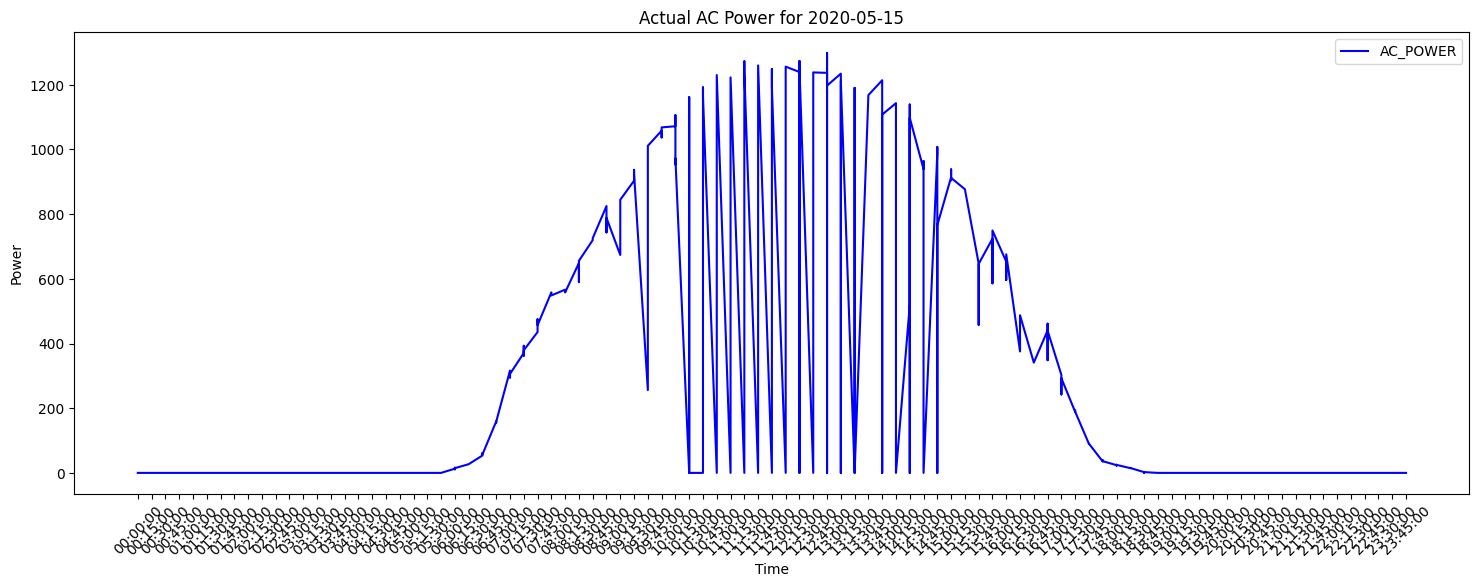

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER', color='blue')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

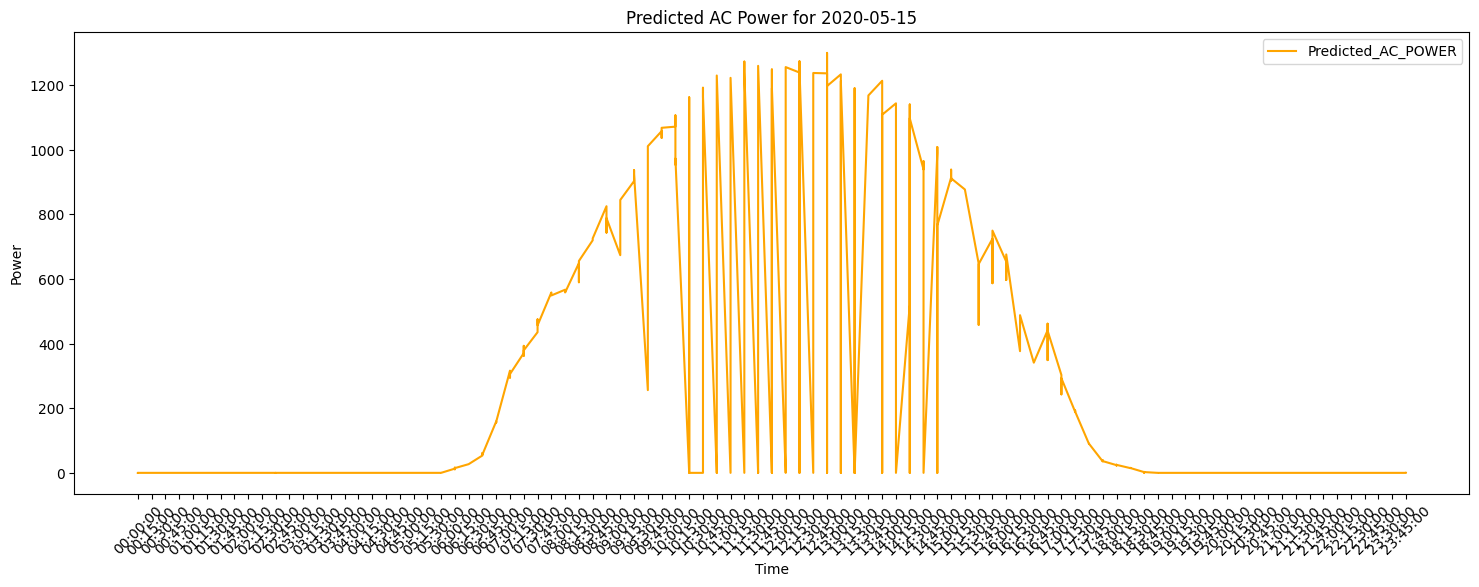

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER', color='orange')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

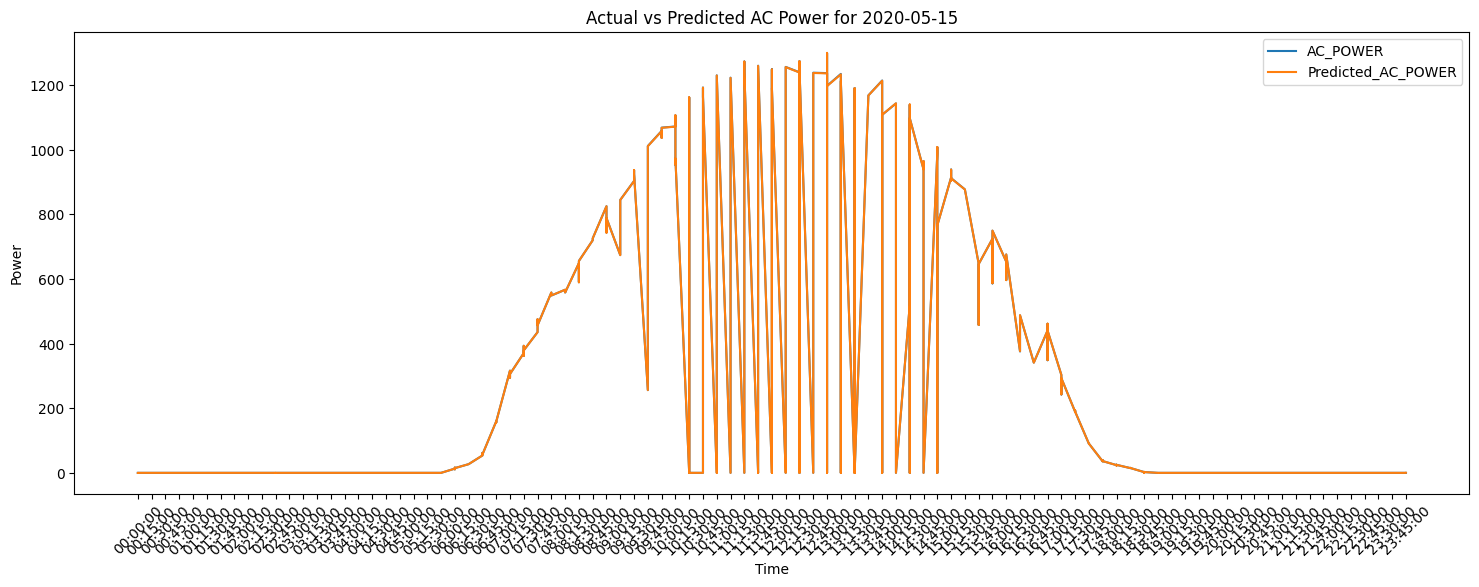

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
chosen_date='2020-05-25'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)


Matching Rows:
       DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
20318  9011.000000  1.412168e+09            33.819129           31.768905   
19832  5807.285714  1.412165e+09            35.411488           56.247193   
19761  4649.400000  1.817799e+08            34.030982           55.331840   
19244     0.000000  2.278209e+06            25.119622           23.583762   
20552  9011.000000  1.412168e+09            28.177047           26.731219   
...            ...           ...                  ...                 ...   
20041  6623.000000  1.753756e+06            38.036724           50.688926   
18938     0.000000  2.278209e+06            26.233415           24.790602   
19366    67.000000  1.660043e+09            26.175266           27.515106   
19438   341.866667  1.660043e+09            28.048433           34.359771   
20412  6197.000000  4.018270e+05            31.464323           30.363740   

       IRRADIATION     DC_POWER     AC_POWER  Predicted_AC_P

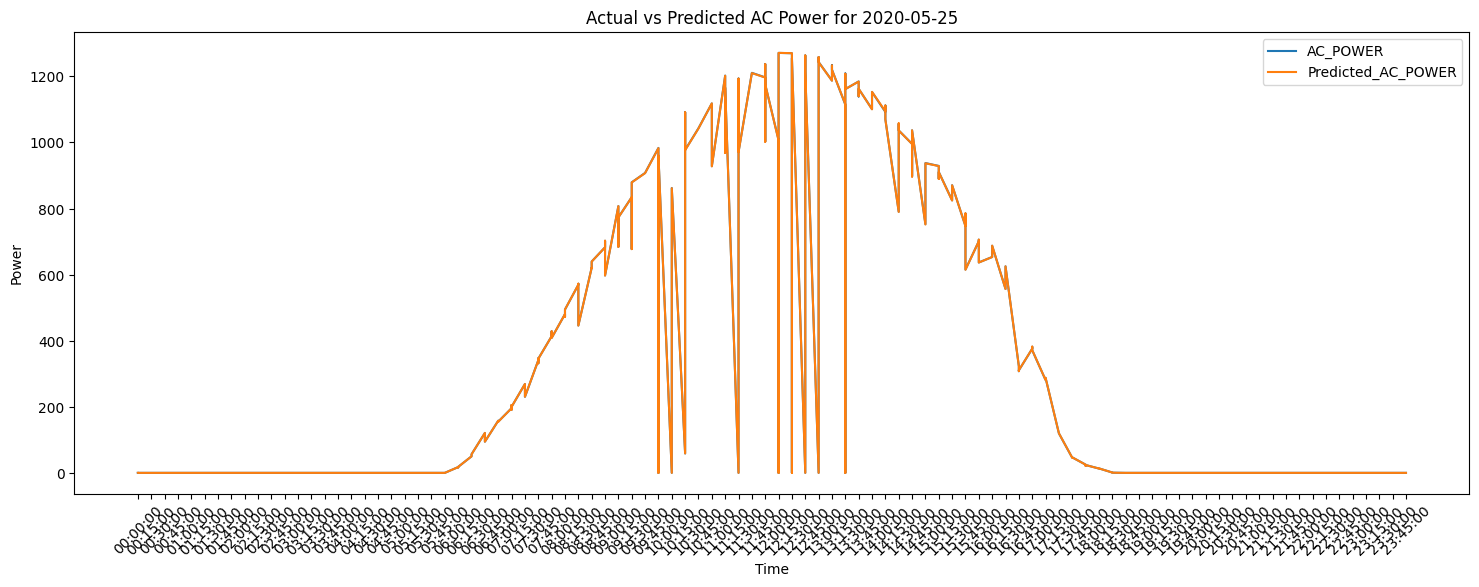

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-05-25'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
chosen_date='2020-06-05'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)

Matching Rows:
       DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
42307  3421.000000  2.356529e+06            24.566194           22.658557   
40625  6168.000000  1.348478e+09            23.480557           22.333355   
41601  1852.571429  4.638236e+05            29.535262           36.872007   
42227  2878.000000  1.795065e+09            25.245069           23.502124   
40624  6331.000000  1.116675e+08            23.480557           22.333355   
...            ...           ...                  ...                 ...   
40608     0.000000  5.937352e+08            23.390665           21.926786   
42245  7393.000000  1.215417e+09            25.091887           23.406083   
40322     0.000000  5.937352e+08            23.608251           21.823796   
42008  3053.000000  2.827303e+08            27.255858           26.336772   
42148  7561.000000  5.937427e+08            25.942817           24.318806   

       IRRADIATION    DC_POWER  AC_POWER  Predicted_AC_POWER

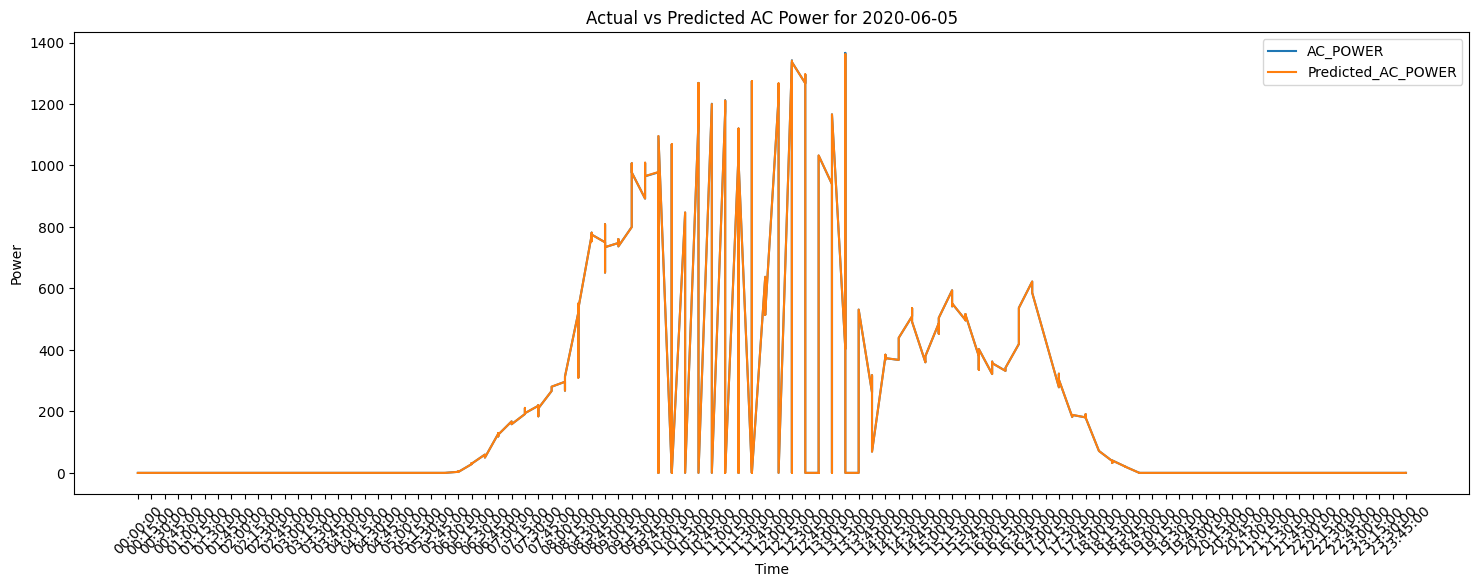

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-06-05'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
chosen_date='2020-06-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]

if matching_rows.empty:
    print("No data found for the chosen date.")
else:
    print("Matching Rows:")
    print(matching_rows)

Matching Rows:
       DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
62683  5344.000000  1.215475e+09            28.618339           35.308985   
61932     5.866667  1.068805e+08            24.396149           24.135337   
62630  4978.200000  5.938039e+08            29.085485           40.656643   
62760  1980.142857  1.412282e+09            28.225434           32.099031   
62103   526.733333  1.660177e+09            27.623727           36.123373   
...            ...           ...                  ...                 ...   
62792  1855.400000  2.643391e+06            27.726645           32.245049   
63436  6151.000000  2.827795e+08            24.127244           23.304377   
63462  2231.000000  8.386371e+08            24.216272           22.997750   
62296   615.000000  8.386355e+08            30.502933           44.894978   
61951    18.933333  5.052839e+05            24.604525           25.129300   

       IRRADIATION    DC_POWER    AC_POWER  Predicted_AC_POW

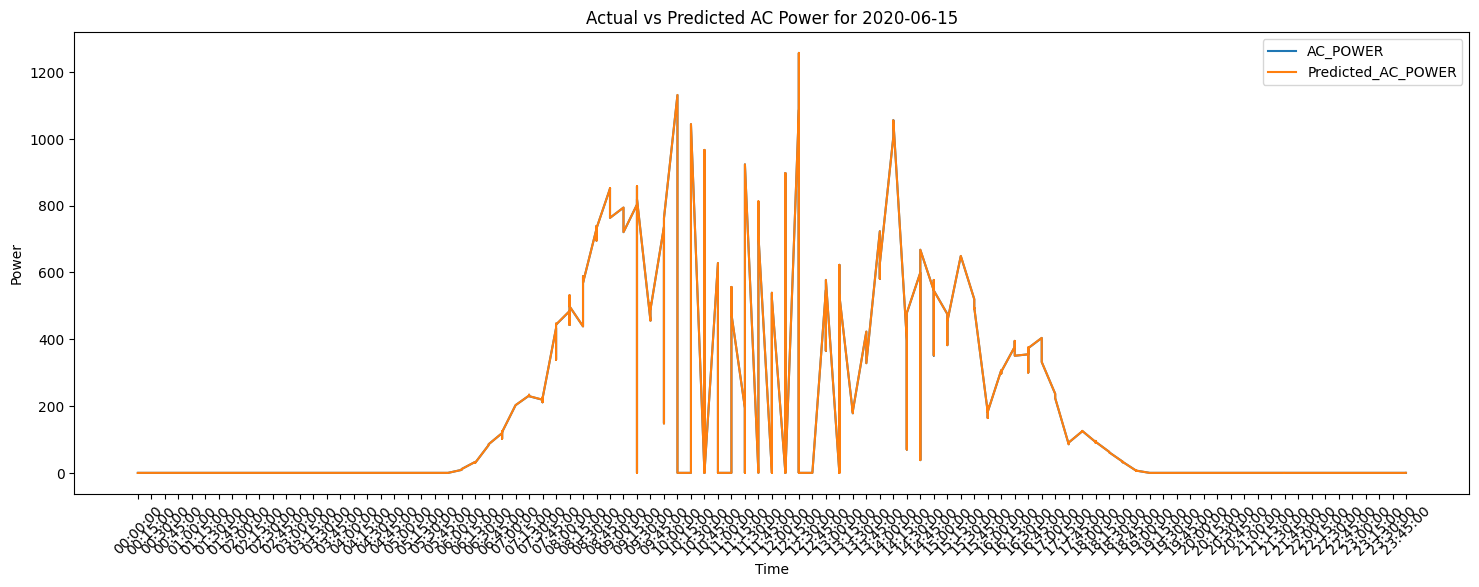

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
chosen_date='2020-06-15'
chosen_date = datetime.strptime(chosen_date, '%Y-%m-%d').date()

matching_rows = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = testing_data_with_predictions[testing_data_with_predictions['DATE'] == chosen_date]
selected_data = selected_data.sort_values(by='TIME')

# Plotting AC power and predicted AC power
plt.figure(figsize=(18, 6))
plt.plot(selected_data['TIME'], selected_data['AC_POWER'], label='AC_POWER')
plt.plot(selected_data['TIME'], selected_data['Predicted_AC_POWER'], label='Predicted_AC_POWER')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Actual vs Predicted AC Power for ' + str(chosen_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-24-7218d51822d4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-7218d51822d4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-7218d51822d4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-7218d51822d4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_data = aggregated_data.append(week_aggregated_data)
<ipython-input-24-7218d51822d4>:25: FutureWarning: The frame.app

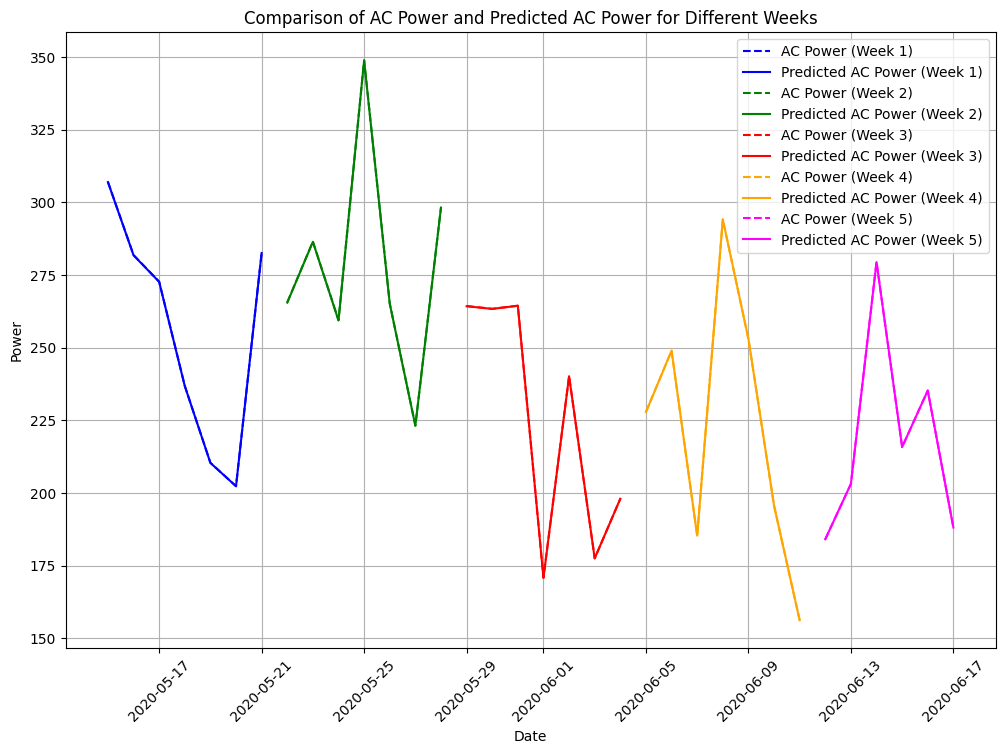

In [ ]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

weeks_to_compare = [
    (datetime.date(2020, 5, 15), datetime.date(2020, 5, 21)),
    (datetime.date(2020, 5, 22), datetime.date(2020, 5, 28)),
    (datetime.date(2020, 5, 29), datetime.date(2020, 6, 4)),
    (datetime.date(2020, 6, 5), datetime.date(2020, 6,11)),
    (datetime.date(2020, 6, 12), datetime.date(2020, 6,17)),
]

colors = ['blue', 'green', 'red', 'orange', 'magenta']

aggregated_data = pd.DataFrame(columns=['DATE', 'AC_POWER', 'Predicted_AC_POWER'])

for i, (start_date, end_date) in enumerate(weeks_to_compare):
    # Filter the testing data for the selected week
    week_data = testing_data_with_predictions[(testing_data_with_predictions['DATE'] >= start_date) & (testing_data_with_predictions['DATE'] <= end_date)]

    # Aggregate AC power and predicted AC power over time for each date
    week_aggregated_data = week_data.groupby('DATE')[['AC_POWER', 'Predicted_AC_POWER']].mean().reset_index()

    # Append aggregated data for the current week to the main DataFrame
    aggregated_data = aggregated_data.append(week_aggregated_data)

# Plotting AC power and predicted AC power for each week
plt.figure(figsize=(12, 8))
legend_labels = []
legend_handles = []
for i, (start_date, end_date) in enumerate(weeks_to_compare):
    week_label = f'Week {i+1}'
    week_data = aggregated_data[(aggregated_data['DATE'] >= start_date) & (aggregated_data['DATE'] <= end_date)]
    ac_power_handle, = plt.plot(week_data['DATE'], week_data['AC_POWER'], linestyle='--', color=colors[i])
    predicted_ac_power_handle, = plt.plot(week_data['DATE'], week_data['Predicted_AC_POWER'], color=colors[i])
    legend_labels.extend([f'AC Power ({week_label})', f'Predicted AC Power ({week_label})'])
    legend_handles.extend([ac_power_handle, predicted_ac_power_handle])

plt.xlabel('Date')
plt.ylabel('Power')
plt.title('Comparison of AC Power and Predicted AC Power for Different Weeks')
plt.legend(legend_handles, legend_labels)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


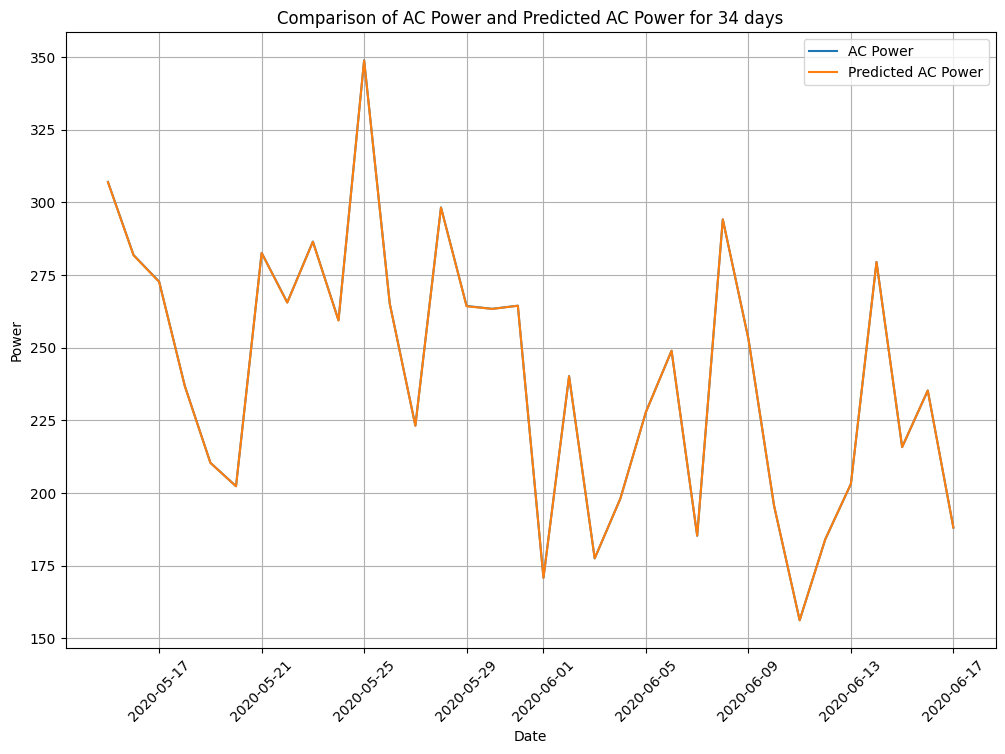

In [ ]:
import matplotlib.pyplot as plt

start_date = datetime.date(2020, 5, 15)
end_date = datetime.date(2020, 6, 17)

whole_data = testing_data_with_predictions[(testing_data_with_predictions['DATE'] >= start_date) & (testing_data_with_predictions['DATE'] <= end_date)]

# Aggregate AC power and predicted AC power over time for each date
whole_aggregated_data = whole_data.groupby('DATE')[['AC_POWER', 'Predicted_AC_POWER']].mean().reset_index()

# Plotting AC power and predicted AC power for the selected time period
plt.figure(figsize=(12, 8))
plt.plot(whole_aggregated_data['DATE'], whole_aggregated_data['AC_POWER'], label='AC Power')
plt.plot(whole_aggregated_data['DATE'], whole_aggregated_data['Predicted_AC_POWER'], label='Predicted AC Power')
plt.xlabel('Date')
plt.ylabel('Power')
plt.title('Comparison of AC Power and Predicted AC Power for 34 days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
